# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.


Dentro del negocio de la venta/compra de automoviles, tanto nuevos como usados, se tiene un amplia gama de factores que influyen al comprar un automóvil dependiendo de las nececidades, gustos, presupuestos, zonas de venta, renombre, confiabilidad, durabilidad, etc. Lo que nos lleva a la siguiente pregunta:
- ¿Qué características de los distintos modelos determinan el precio del vehículo?

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt

### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame
df = pd.read_csv('datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [3]:
# imprime la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
df.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17



De entrada podemos observar que contamos con `51525` registros, detectamos que las columnas `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd` tienen registros vacíos, de lo que podemos ubicar de inmediato que `is_4wd` es aparentemente la columna más critica teniendo más del `50%` de datos `null`.

Por otro lado, también podemos identificar que hay columnas que aparentemente tiene un tipo de dato que no corresponde con el adecuado para la característica que describe, tal es el caso de `model_year`, `cylinders`, `odometer`, `is_4wd` y `date_posted`.

Profundizaremos en el análisis de los registros contenidos en nuestro `dataframe` con la intención de hacer el preprocesamiento adecuado para extraer la mayor información posible de los datos y proporcionar un reporte preciso y sencillo de entender.

In [5]:
# Analizando los datos por columna de "df"
for column in df.columns:
    print(f"Para la columna {column}:\n",df[column])

Para la columna price:
 0         9400
1        25500
2         5500
3         1500
4        14900
         ...  
51520     9249
51521     2700
51522     3950
51523     7455
51524     6300
Name: price, Length: 51525, dtype: int64
Para la columna model_year:
 0        2011.0
1           NaN
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64
Para la columna model:
 0                bmw x5
1            ford f-150
2        hyundai sonata
3            ford f-150
4          chrysler 200
              ...      
51520     nissan maxima
51521       honda civic
51522    hyundai sonata
51523    toyota corolla
51524     nissan altima
Name: model, Length: 51525, dtype: object
Para la columna condition:
 0             good
1             good
2         like new
3             fair
4        excellent
           ...    
51520     like new
51521      salvage
51522  

De acuerdo con las impresiones anteriores, podemos concluir lo siguiente:
- La columna `price` es numérica que es correcto.
- La columna `model_year` es del tipo `flotante`, sin embargo, debe ser del tipo `entero`.
- La columna `model` es del tipo `object` lo cual es correcto.
- La columna `condition` es del tipo `object`, sin embargo, esta es a su vez categórica.
- La columna `cylinders` es del tipo `flotante` y debería ser `entera`.
- La columna `fuel` es del tipo `object`, ademas que es categoríca.
- La columna `odometer` es del tipo `flotante` y debería ser `entera`.
- La columna ` type` es del tipo `object` además de categórica.
- La columna `paint_color` es del tipo `object` ademas de categórica.
- La columna `is_4wd` es del tipo `float` ademas de categórica.
- La columna `days_listed` es del tipo `entera` y es correcto.


### Conclusiones y siguientes pasos

Para poder trabajar con el `dataframe` de forma correcta debemos trabajar con ellos de distintas maneras si los datos lo permiten. Las acciones a tomar serán las siguientes:

- Trabajar con los valores ausentes: Investigar la viabilidad de completar o eliminar valores ausentes dependiendo de la cantidad de información aportada por sus datos.
- Corregir los tipos de datos: Algunas columnas estan con un formato de tipo de dato erroneo, esto a la larga podría representar un problema a la hora de trabajar con su contenido; por ende, se va a asignar el tipo de dato adecuado a su característica.
- Trabajar con datos duplicados: Los datos duplicados pueden provocar sesgos en la información, por esta razón es necesario proceder a eliminarlos.

Cabe resaltar que hasta este punto se plantean las posibles acciones a tomar en las siguientes líneas, sin embargo, esto podría tomar otro rumbo al ir trabajando los datos.


## Tratar los valores ausentes (si hay)

### Trabajando con "is_4wd"

In [6]:
# trabajando con valores ausentes para la columna "is_4wd"
df.groupby('is_4wd')['price'].count()

is_4wd
1.0    25572
Name: price, dtype: int64

Esta columna es sencilla de trabajar pues lo que se trata de expresar es que aquellos automóviles que cuentan con tracción en las 4 ruedas tienen asignado un valor de 1 mientras el resto tienen valores ausentes. Por lo tanto, aquellos registros que tengan un valor `null`, serán remplazados por un 0. 

In [7]:
# Rellenando valores ausentes en la columna "is_4wd"
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] == 1, 0)

In [8]:
# Comprobando cambios en "df" original
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Trabajando con "cylinders"

Procederos a analizar que es lo que sucede con los valores ausentes presentes en la columna `cylinders`.

In [9]:
# Analizando la columna "cylinders" que contiene registros vacios
df_cylinders = df.cylinders.value_counts(ascending=False)
df_cylinders

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

Con la información que nos proporciona la agrupación, podemos concluir dos cosas:
- Cerca del 88% de los registros se encuentra entre 4, 6 y 8 cilindros.
- Los datos categóricos proporcionados deben ser del tipo `int`

Para poder trabajar con esta columna, la columna `cylinders` depende enteramente de `model` y `model_year` debido a la manofactura de los automóviles, por tal motivo, se decidio calcular el cilindraje máximo de las tablas filtradas con estas categorías y en caso de no poder construir una tabla filtrada, los resultados se repartirían uno a uno entre las categorías más representativas en la columna `cylinders`, es decir, entre `8.0`, `6.0` y `4.0`.

In [10]:
# Añadiendo los regitros faltantes para la columna "cylinders"
counter = 1
def set_cylinders(row):
    global counter
    cylinders = row['cylinders']
    if pd.isna(cylinders):
        if counter == 1:
            counter += 1
            return 8.0
        elif counter == 2:
            counter += 1
            return 6.0
        elif counter == 3:
            counter = 1
            return 4.0
    else:
        return row['cylinders']
        
df['cylinders'] = df.apply(set_cylinders,axis=1)

In [11]:
# Validando la distribución de 'cylinders'
df.cylinders.value_counts(ascending=False)

8.0     17598
6.0     17453
4.0     15617
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [12]:
# Verificando nuevamente nuestro df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Continuaremos trabajando los valores ausentes en la columna `odometer` para verificar si es posible o no encontrar patrones congruenes para completar los registros vacios.
Debido a que `odometer` expresa la cantidad de millas recorridas al momento de realizar el registro del vehículo en el sitio web, podriamos comenzar muestreando las millas promedio por año de forma general para verificar si es necesario particularizar el análisis de momento.

In [13]:
# Generando una tabla filtrada para 'model_year' y 'odometer' sin valores nulos en ambos casos
df_odometer = df[(df['model_year'].isna() != True) & (df['odometer'].isna() != True)]
df_odometer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40563 entries, 0 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         40563 non-null  int64  
 1   model_year    40563 non-null  float64
 2   model         40563 non-null  object 
 3   condition     40563 non-null  object 
 4   cylinders     40563 non-null  float64
 5   fuel          40563 non-null  object 
 6   odometer      40563 non-null  float64
 7   transmission  40563 non-null  object 
 8   type          40563 non-null  object 
 9   paint_color   33306 non-null  object 
 10  is_4wd        40563 non-null  float64
 11  date_posted   40563 non-null  object 
 12  days_listed   40563 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 4.3+ MB


<AxesSubplot:xlabel='model_year'>

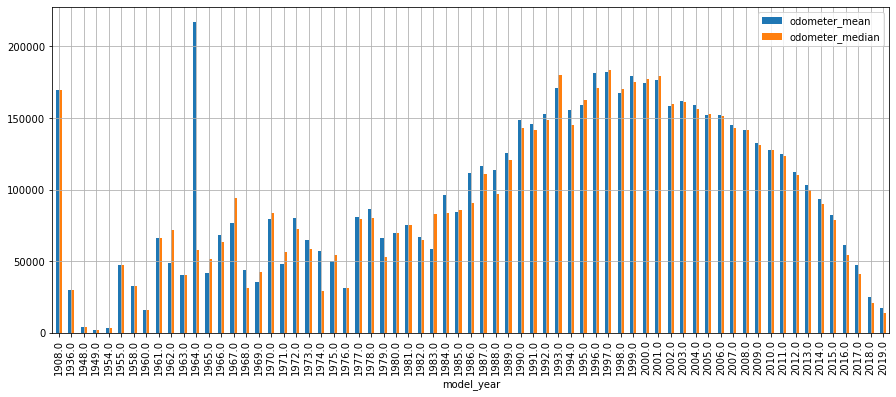

In [14]:
# Graficando "df_odometer"
df_odometer_f = df_odometer.pivot_table(index='model_year',values='odometer',aggfunc=['mean','median'])
df_odometer_f.columns = ['odometer_mean','odometer_median']
df_odometer_f.plot(kind='bar',figsize=(15,6),grid=True)

Del grafico anterior podemos obtener bastante información para nuestra columna propósito. Lo primero a destacar es que las medianas y medias son muy similares en cuanto a las millas recorridas por año a excepción de `1964` en donde podemos apreciar una diferencia abismal. Siempre y cuando contemos con valores razonables en la columna de `model_year` podemos completar aquellas vacías en `odometer` utilizando la mediana, en caso contrario debemos seguir analizando para determinar la forma en la que podremos trabajar con esos registros.

In [15]:
df_odometer = df[(df['model_year'].isna() != True) & (df['odometer'].isna() == True)]
df_odometer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7343 entries, 3 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7343 non-null   int64  
 1   model_year    7343 non-null   float64
 2   model         7343 non-null   object 
 3   condition     7343 non-null   object 
 4   cylinders     7343 non-null   float64
 5   fuel          7343 non-null   object 
 6   odometer      0 non-null      float64
 7   transmission  7343 non-null   object 
 8   type          7343 non-null   object 
 9   paint_color   5985 non-null   object 
 10  is_4wd        7343 non-null   float64
 11  date_posted   7343 non-null   object 
 12  days_listed   7343 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 803.1+ KB


De acuerdo con la información de la tabla, tenemos un total de `7343` registros en los que contamos con la columna `model_year` completa, esto nos ayuda a completar estos registros nulos en la columna `odometer`, por lo tanto, usaremos la mediana con la intención de usar datos que no alteren las proporciones de forma drastica.

In [16]:
# Rellenando valores para la columna "odometer"
df_odometer_f.reset_index(inplace=True)
def set_odometer(row):
    odometer = row['odometer']
    if pd.isna(odometer):
        return df_odometer_f[df_odometer_f['model_year'] == row['model_year']]['odometer_median'].median()
    else:
        return row['odometer']
    
df['odometer'] = df.apply(set_odometer, axis=1)


In [17]:
# Comprobando columna "odometer"
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [18]:
# Verificando información del "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      50975 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Como podemos observar en el resultado, al realizar este procedimiento pudimos trabajar con bastantes registros de la columna `odometer`, inicialmente tenía `43633` registros. Al aplicar este procedimiento logramos rellenar hasta completar `50975` restando `550` registros nulos en esta columna.

Este resultado implicaría un poco más de análisis tomando en cuenta el resto de columnas y verificando si es posible poder completarlas o descartarlas.

Por el momento comenzaremos trabajando con la columna `model_year` visualizando que columnas podrían tener una fuerte relación con esta característica que nos permitieran poder determinar el año del modelo.

In [19]:
# Visualizando correlaciones entre las distintas columnas del "df"
df.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.266497,-0.426930,0.315145,-0.000682
model_year,0.428656,1.000000,-0.131775,-0.501340,0.043384,-0.005703
cylinders,0.266497,-0.131775,1.000000,0.080235,0.361888,0.000908
odometer,-0.426930,-0.501340,0.080235,1.000000,0.030939,0.002808
is_4wd,0.315145,0.043384,0.361888,0.030939,1.000000,0.002003
days_listed,-0.000682,-0.005703,0.000908,0.002808,0.002003,1.000000


Al determinar la correlación entre las distintas columnas y nuestra columna de interes `model_year` podemos observar si bien no es del todo fuerte, hay correlaciones entre algunas de las características que son:
- `model_year` con `price` nos indica que mientras el auto sea un modelo más reciente, el precio será mayor.
- `model_year` con `odometer` nos indica que mientras el auto sea un modelo más reciente, la cantidad de millas registradas será menor.

Basado en estos indicadores, podriamos comenzar a analizar la relación entre `odometer`, `price` y `model_year` a mayor profundidad, además también, hay algúnas columnas que deben ser trabajadas para verificar que no se tenga relación directa de igual forma con `model_year`.

In [20]:
# Visualizando el df
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,8.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Observando a detalle el `df` original, nos percatamos que aun tenemos columnas categóricas que no han podido ser consideredas en la correlación anteriormente presentada, tal es el caso de:
- `condition`
- `fuel`
- `transmission`
- `type`

Teniendo esto en cuenta, aquella columna que a pesar de ser categórica podría también considerarse líneal por la descripción de los registros es `condition`, por ende haremos uso de una categorización numérica con el fin de incorporar esta columna para su análisis.

In [21]:
# Extrayendo las categorías de la columna "condition"
print(df['condition'].unique())

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


In [22]:
# Trabajando con sus categorías para asignarle valores
df['cat_condition'] = pd.Series(len(df))

df['cat_condition'].loc[df['condition'] == 'salvage'] = 0
df['cat_condition'].loc[df['condition'] == 'fair'] = 1
df['cat_condition'].loc[df['condition'] == 'good'] = 2
df['cat_condition'].loc[df['condition'] == 'excellent'] = 3
df['cat_condition'].loc[df['condition'] == 'like new'] = 4
df['cat_condition'].loc[df['condition'] == 'new'] = 5

/var/folders/g2/6f4slx3d02g5s4th9bbb102m0000gn/T/ipykernel_5788/2068821938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat_condition'].loc[df['condition'] == 'salvage'] = 0
/var/folders/g2/6f4slx3d02g5s4th9bbb102m0000gn/T/ipykernel_5788/2068821938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat_condition'].loc[df['condition'] == 'fair'] = 1
/var/folders/g2/6f4slx3d02g5s4th9bbb102m0000gn/T/ipykernel_5788/2068821938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [23]:
# Visualizando columna "cat_condition"
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,4.0
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,0.0,2019-03-22,9,1.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,3.0


In [24]:
# Validando nuevamente la correlación del "df" original
df.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,cat_condition
price,1.000000,0.428656,0.266497,-0.426930,0.315145,-0.000682,0.221518
model_year,0.428656,1.000000,-0.131775,-0.501340,0.043384,-0.005703,0.282421
cylinders,0.266497,-0.131775,1.000000,0.080235,0.361888,0.000908,-0.055028
odometer,-0.426930,-0.501340,0.080235,1.000000,0.030939,0.002808,-0.294171
is_4wd,0.315145,0.043384,0.361888,0.030939,1.000000,0.002003,0.012856
days_listed,-0.000682,-0.005703,0.000908,0.002808,0.002003,1.000000,-0.002404
cat_condition,0.221518,0.282421,-0.055028,-0.294171,0.012856,-0.002404,1.000000


La nueva columna generada `cat_condition` se pudo incorporar al momento de hacer la tabla de correlación del `df` original y nos proporciona la siguiente información:
- `cat_condition` tiene una correlación con la columna `price` expresando que, mientras mejor sea la condición del automovil, el precio es mayor.
- `cat_condition` con `model_year` expresa una correlación positiva lo que es que la condición del automovil es mejor mientras sea un modelo más reciente.
- `cat_condition` con `odometer` tienen una correlación negativa expresando que entre mejor la condición del automovil, el millaje es menor.

Con esto podemos determinar que para poder analizar la columna `model_year` debemos analizar la realción que tiene con las columnas:

- `price`
- `cat_condition`
- `odometer`

<AxesSubplot:xlabel='model_year'>

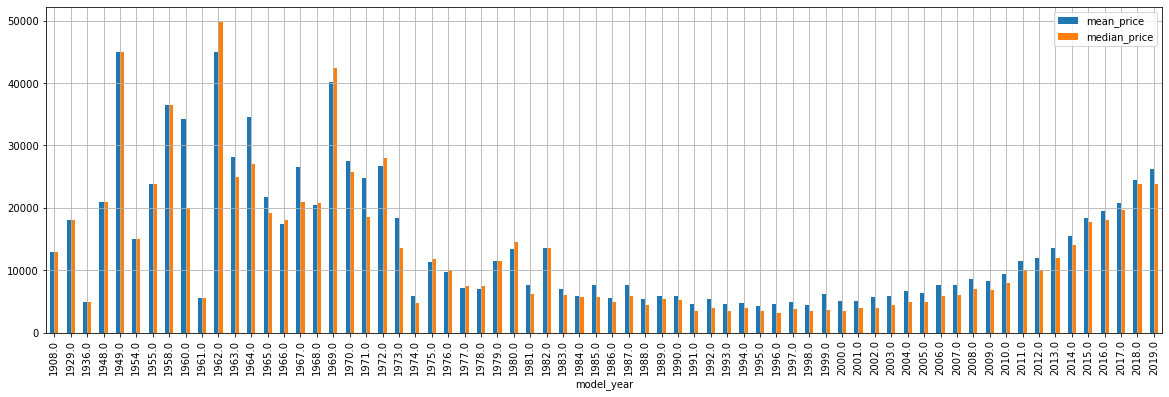

In [25]:
# Analizando relación de "model_year" con "price"
df_price = df.pivot_table(index='model_year',values='price',aggfunc=['mean','median'])
df_price.columns = ['mean_price','median_price']
df_price.plot(kind='bar',figsize=(20,6),grid=True)

De acuerdo con la gráfica podemos observar un aumento exponencia a medida que `model_year` es más reciente a partir de `1988` sin embargo, modelos anteriores, se pueden observar un aumento anormal en los precios lo que puede concluir algunas cosas de momento:
- Hay autos que se encuentran en buen estado y que su precio por consiguiente es alto (tal vez modelos clásicos)
- Para el año `19361` y `1961` puede que en su mayoria englobe autos muy económicos que no estan en buenas condiciones (para rescate)

cat_condition
3.0    24773
2.0    20145
4.0     4742
1.0     1607
5.0      143
0.0      115
Name: price, dtype: int64


<AxesSubplot:xlabel='cat_condition'>

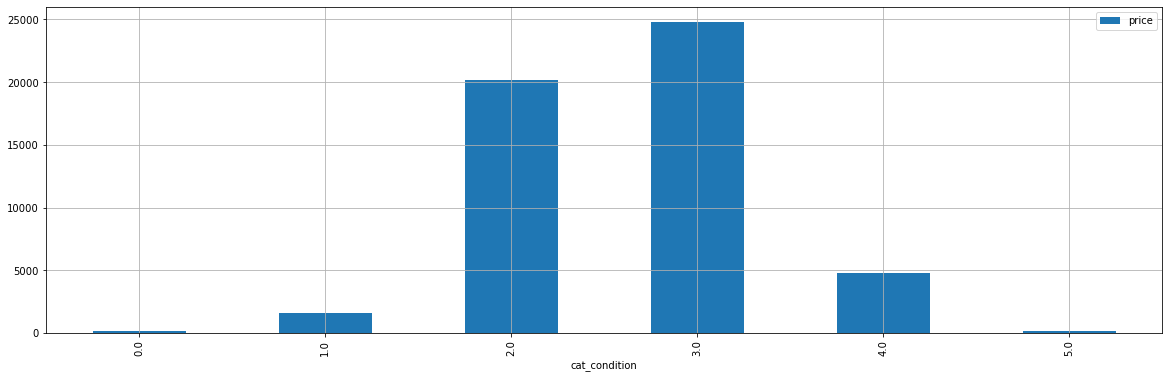

In [26]:
# Analizando relación de "model_year" con "cat_condition"
print(df.groupby('cat_condition').count()['price'].sort_values(ascending=False))
df.groupby('cat_condition').count()['price'].plot(legend=True,kind='bar',figsize=(20,6),grid=True)

De acuerdo con la tabla y su gráfica podemos observar que las categorías más representativas y por mucho son:
- `excelent`
- `good`

Esto equivale al `87.1%` de los registros en conjunto, por lo que el `13%` restante involucra las condiciones `like new`, `fair`, `new` y `salvage` de mayor a menor siendo casí despreciables estas últimas dos categorías.

<AxesSubplot:xlabel='model_year'>

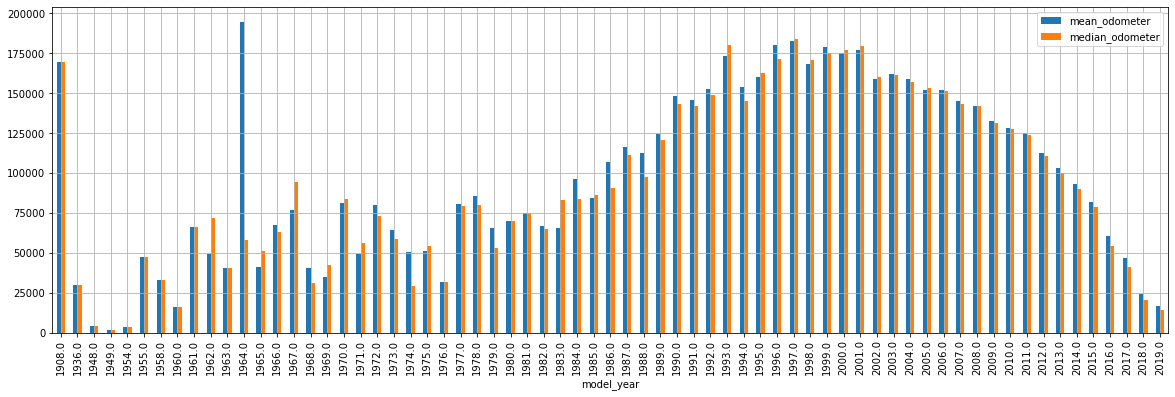

In [27]:
# Analizando relación de "model_year" con "odometer"
df_odometer = df.pivot_table(index='model_year',values='odometer',aggfunc=['mean','median'])
df_odometer.columns = ['mean_odometer','median_odometer']
df_odometer.plot(legend=True,kind='bar',figsize=(20,6),grid=True)

Algunos de los automóviles, tienen una condición de pricaticamente nuevo (no por la columna `condition`) debido a que las millas promedio/mediana recorridas es mínima en el año, tal es el caso de `1948` a `1950`.

Para el caso del año `1964` podemos observar una diferencia abismal entre `mean` y `median`, estando `mean` por `195000` millas recorridas aproximadamente mientras que `median` esta `55000` aproximadamente.

La medida de confianza anual es `median` debido a que se esta sacando un promedio de todo tipo de modelos con todo tipo de características seccionandolo por `model_year`, sin embargo, no debemos de perder de vista aquellos valores atípicos que estan presentes en nuestros datos.

Comenzaremos a relacionar las columnas de forma que descubramos patrones a seguir repecto a la columna `model_year`.

In [28]:
# Generando un "df" filtrado sin valores null en "model_year"
df_model_year = df[df['model_year'].isna() == False]
df_model_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          47906 non-null  int64  
 1   model_year     47906 non-null  float64
 2   model          47906 non-null  object 
 3   condition      47906 non-null  object 
 4   cylinders      47906 non-null  float64
 5   fuel           47906 non-null  object 
 6   odometer       47905 non-null  float64
 7   transmission   47906 non-null  object 
 8   type           47906 non-null  object 
 9   paint_color    39291 non-null  object 
 10  is_4wd         47906 non-null  float64
 11  date_posted    47906 non-null  object 
 12  days_listed    47906 non-null  int64  
 13  cat_condition  47906 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.5+ MB


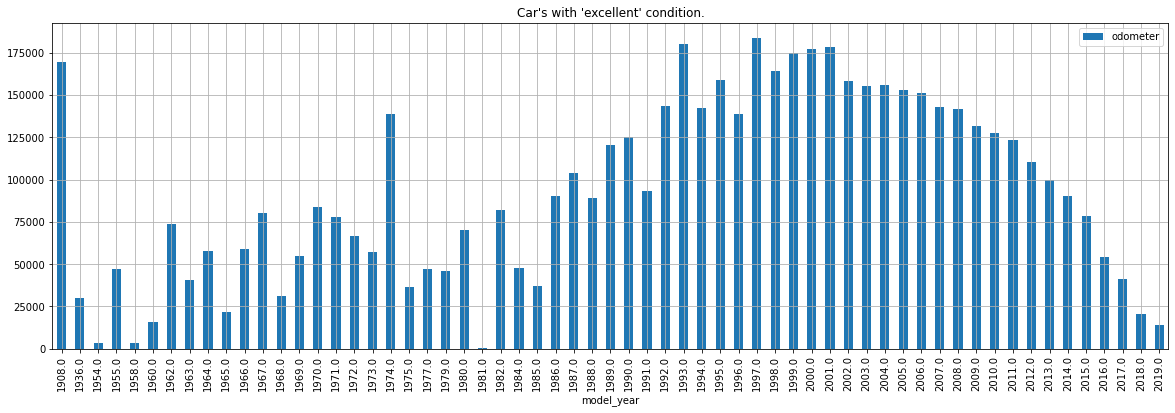

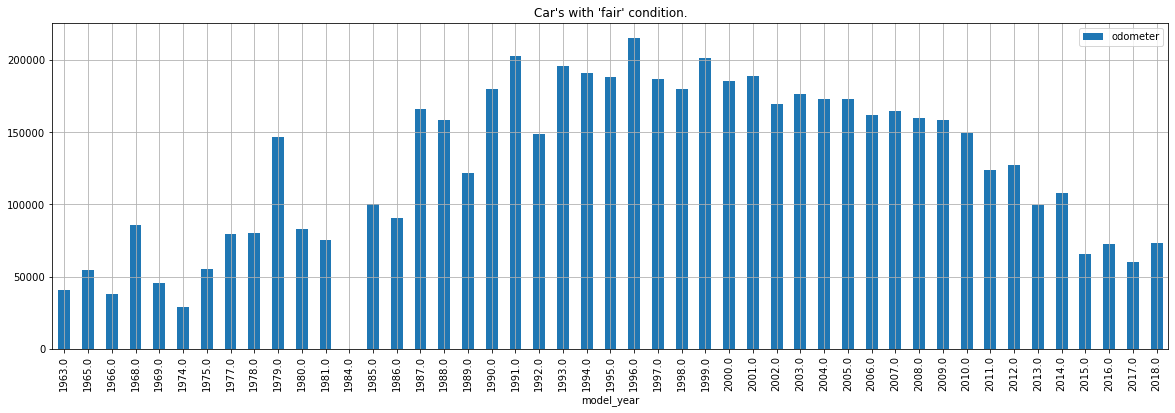

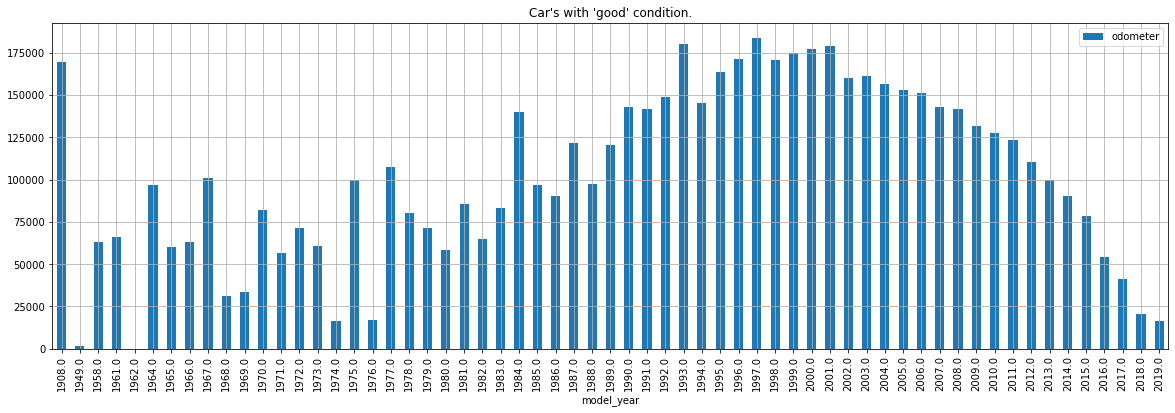

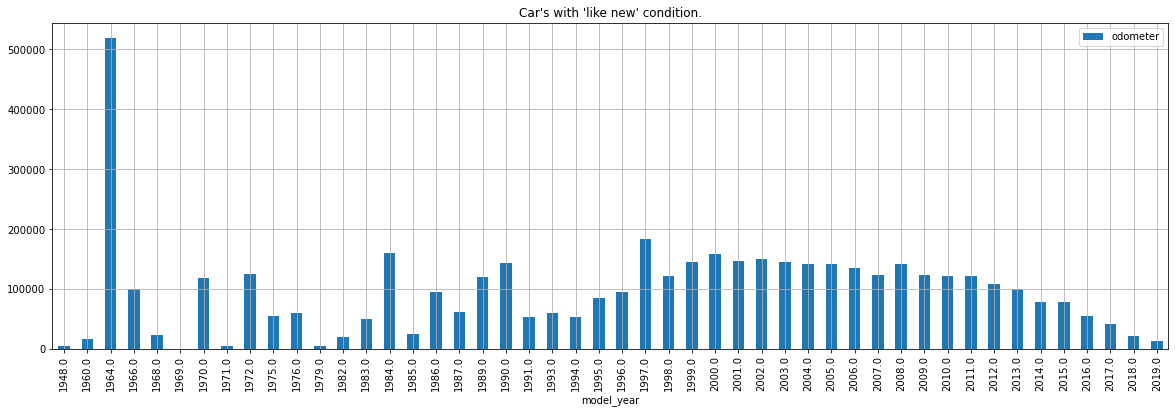

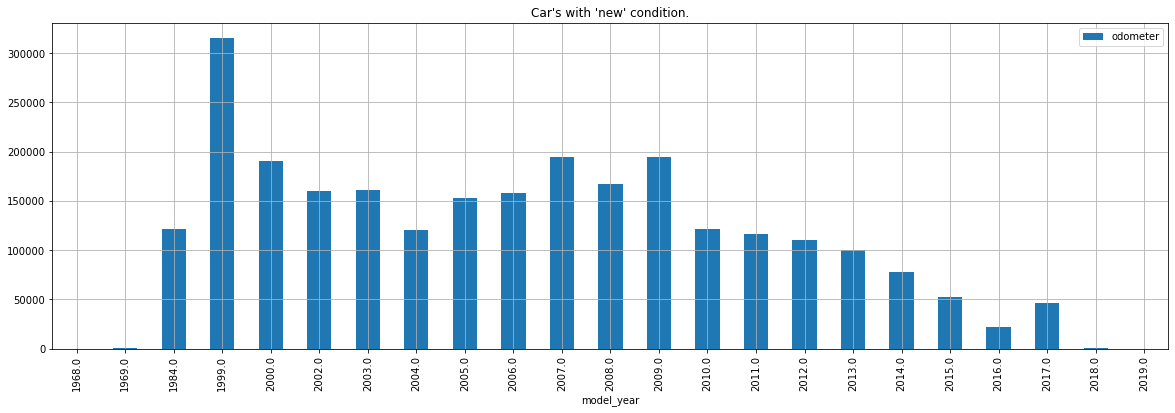

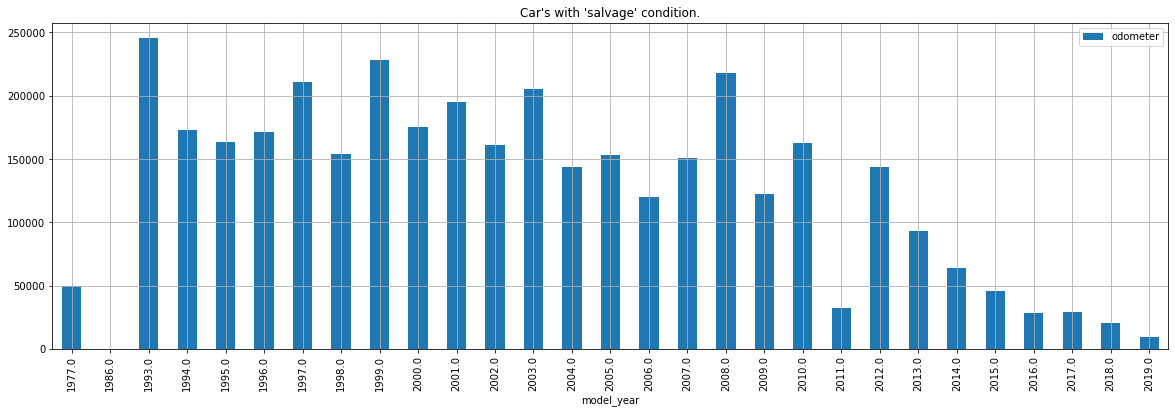

In [29]:
# Analizando relacion entre columnas de "df_model_year" respecto a "odometer"
for condition, table in df_model_year.groupby('condition'):
    table.pivot_table(index='model_year',values='odometer',aggfunc='median').plot(kind='bar',figsize=(20,6),grid=True,title=f"Car's with '{condition}' condition.")

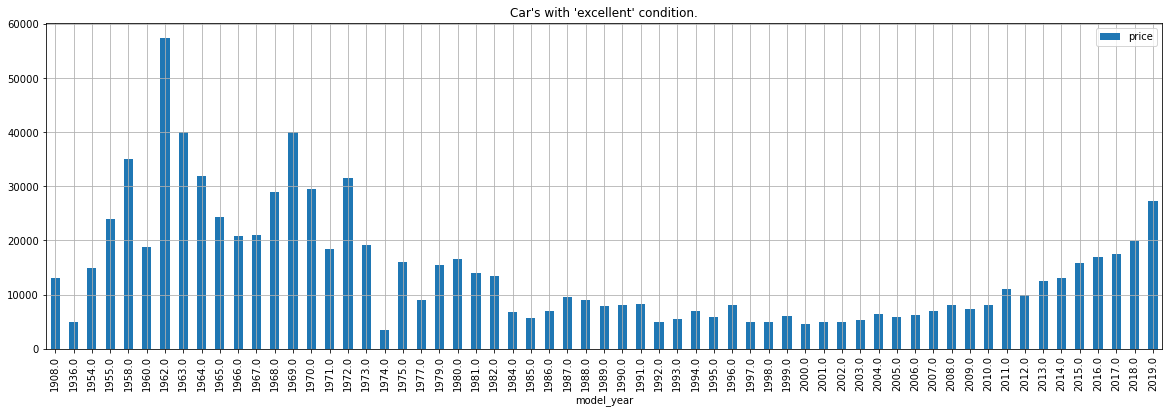

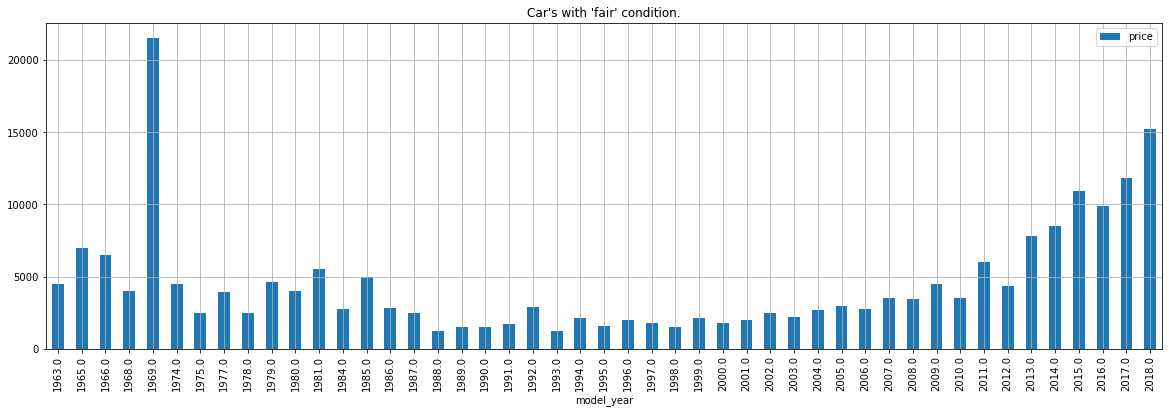

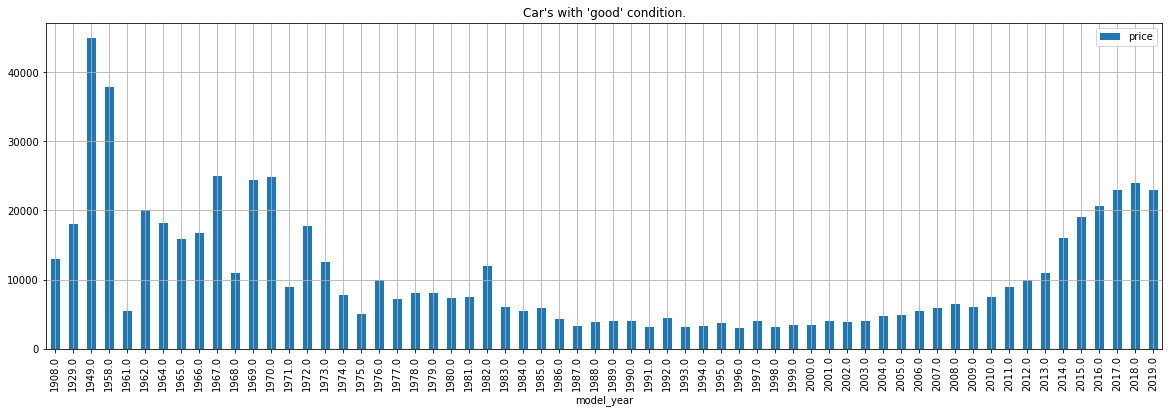

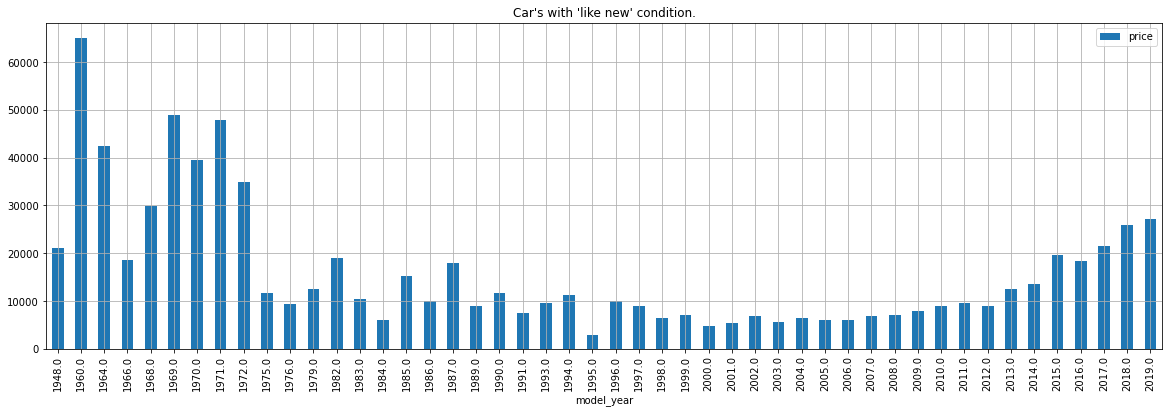

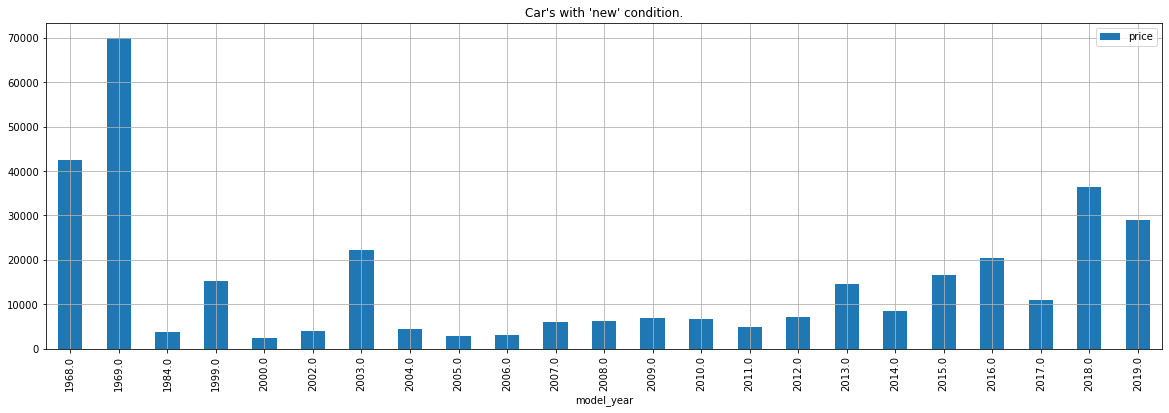

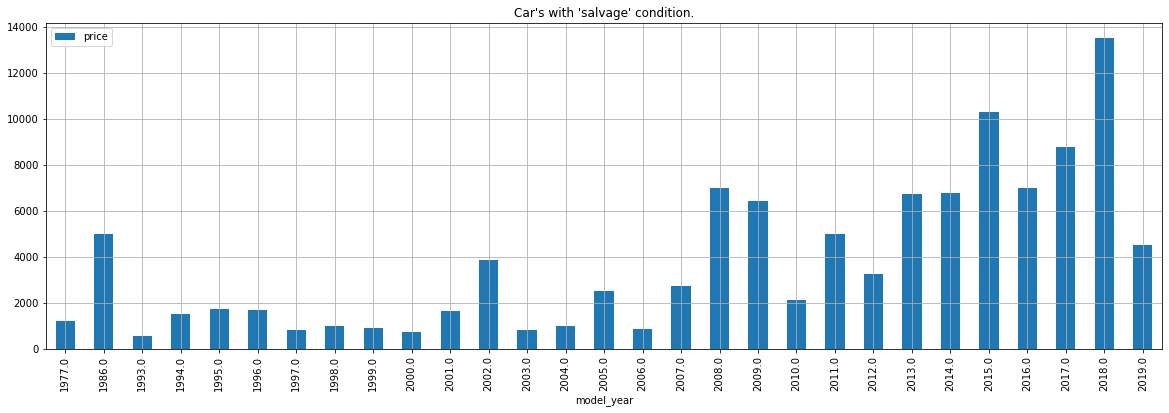

In [30]:
# Analizando relacion entre columnas de "df_model_year" respecto a "price"
for condition, table in df_model_year.groupby('condition'):
    table.pivot_table(index='model_year',values='price',aggfunc='median').plot(kind='bar',figsize=(20,6),grid=True,title=f"Car's with '{condition}' condition.")

Para poder continuar trabajando con la columna `model_year` es importante, debido a que tanto `odometer` como `price` son columnas con información líneal, que fijemos rangos de acuerdo a lo que puede ser encontrado en las distintas subtablas.

Cabe resaltar que en todos los años y respecto a la columna `price`, tenemos valores atípicos puesto que hay precios en 0 y del mismo modo para la columna `odometer`. Esto puede representar dos cosas:
- Son años en los que no se tiene registro de algún modelo con algún precio y lo mismo con el millaje.
- Realmente tenemos valores en 0 que deben ser analizados.

Cualquiera que sea de los dos casos, investigaremos a fondo que es lo que esta sucediendo con estos datos para que de esta forma podamos llevar los valores más adecuados a la columna de `model_year`.

<AxesSubplot:xlabel='model_year'>

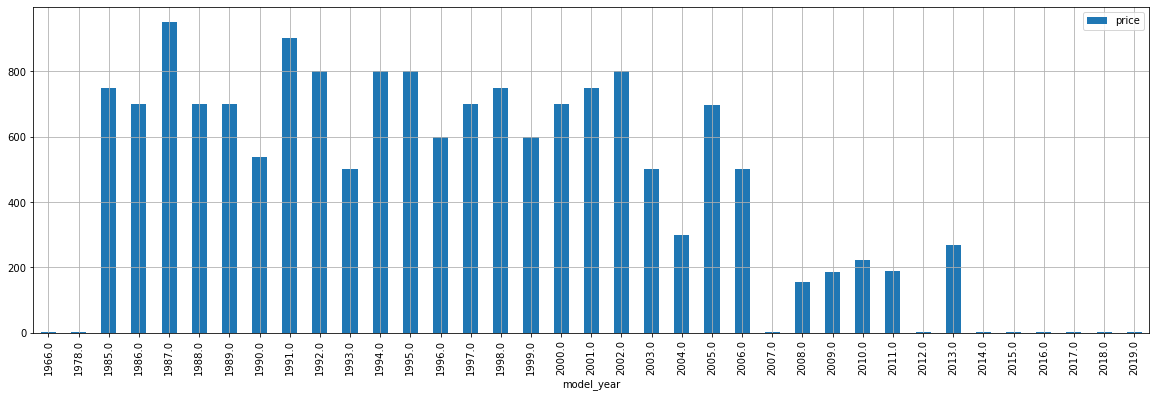

In [31]:
# Analizando los registros en 0 para la columna "price"
df_model_year[df_model_year['price'] < 1000].pivot_table(index='model_year',
                                                         values='price',
                                                         aggfunc='median').plot(kind='bar',figsize=(20,6),grid=True)

In [32]:
# Observado muetras de aquellos años que presentan precios por debajo de 1000
df_model_year[(df_model_year['price'] < 1000) & (df_model_year['model_year'] == 2012.0)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition
3439,211,2012.0,ford taurus,excellent,6.0,gas,130982.0,automatic,sedan,red,0.0,2018-12-07,75,3.0
5944,995,2012.0,honda accord,excellent,4.0,gas,134771.0,automatic,coupe,black,0.0,2018-11-10,23,3.0
5985,995,2012.0,ford mustang,excellent,6.0,gas,115940.0,automatic,coupe,blue,0.0,2018-05-18,31,3.0
6254,795,2012.0,ford focus,excellent,4.0,gas,124000.0,automatic,sedan,grey,0.0,2018-06-10,63,3.0
6256,995,2012.0,ford focus,excellent,4.0,gas,110517.5,automatic,sedan,NaN,0.0,2018-08-07,27,3.0
8228,1,2012.0,honda odyssey,excellent,6.0,gas,113400.0,automatic,mini-van,grey,0.0,2018-12-20,3,3.0
9310,1,2012.0,ford mustang,excellent,10.0,gas,41469.0,automatic,coupe,orange,1.0,2018-08-13,20,3.0
10875,1,2012.0,ford mustang,excellent,10.0,gas,41469.0,automatic,coupe,orange,1.0,2019-03-31,5,3.0
10879,1,2012.0,jeep wrangler,excellent,6.0,gas,110517.5,automatic,SUV,NaN,1.0,2018-11-22,54,3.0
10896,900,2012.0,nissan versa,fair,4.0,gas,135000.0,automatic,sedan,black,0.0,2018-09-14,34,1.0


Podemos observar dos cosas:
- La primera es que cabe la posibilidad de que los precios no este completos, es decir, que falto colocar un cero en el valor registrado.
- Si bien hay muchos registros que tienen como precio 1, también se llego a encontrar que son registros duplicados con diferentes fechas de registro, es decir, mismo millaje, mismas color, etc.

Debido a esto, investigaremos aquellos registros que tienen estas características.

In [33]:
# Validando registros duplicados
df.duplicated(subset=['price','model_year','model','condition','cylinders','fuel','odometer',
                      'transmission','type','paint_color','is_4wd']).sum()

7429

In [34]:
# Verificando información de duplicados
df[df.duplicated(subset=['price','model_year','model','condition','cylinders','fuel','odometer',
                         'transmission','type','paint_color','is_4wd'])]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition
172,18600,2012.0,ford mustang gt coupe 2d,good,8.0,gas,96562.0,other,coupe,red,0.0,2018-07-31,59,2.0
268,28200,2012.0,ford f-350 sd,excellent,8.0,diesel,129000.0,automatic,truck,black,1.0,2018-09-26,28,3.0
270,34900,2017.0,ford f-250 sd,excellent,8.0,gas,41000.0,automatic,truck,white,1.0,2018-12-06,56,3.0
271,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,1.0,2018-07-07,9,3.0
273,19900,2013.0,ford f-150,excellent,6.0,gas,79657.0,automatic,truck,silver,1.0,2019-03-01,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37,3.0
51493,9450,2015.0,ford focus se,excellent,4.0,gas,27000.0,automatic,sedan,grey,0.0,2019-03-22,88,3.0
51494,7999,2009.0,chevrolet equinox,excellent,6.0,gas,95021.0,automatic,SUV,silver,1.0,2019-01-03,8,3.0
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25,2.0


In [35]:
# Eliminando registros en la plataforma duplicados
df = df.drop_duplicates(subset=['price','model_year','model','condition','cylinders','fuel','odometer',
                              'transmission','type','paint_color','is_4wd'],ignore_index=True)

In [36]:
# Verificando nuevo "df"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44096 entries, 0 to 44095
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          44096 non-null  int64  
 1   model_year     40565 non-null  float64
 2   model          44096 non-null  object 
 3   condition      44096 non-null  object 
 4   cylinders      44096 non-null  float64
 5   fuel           44096 non-null  object 
 6   odometer       43554 non-null  float64
 7   transmission   44096 non-null  object 
 8   type           44096 non-null  object 
 9   paint_color    35433 non-null  object 
 10  is_4wd         44096 non-null  float64
 11  date_posted    44096 non-null  object 
 12  days_listed    44096 non-null  int64  
 13  cat_condition  44096 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 4.7+ MB


Podemos observar que la cantidad de registros duplicados en la página para el mismo automovil era relativamente considerable, una vez estos han sido eliminados podemos retomar el análisis de la columna `model_year`, `price`, `odometer` y `cat_condition`.

<AxesSubplot:title={'center':'Price distribution by "model_year"'}, xlabel='model_year', ylabel='price'>

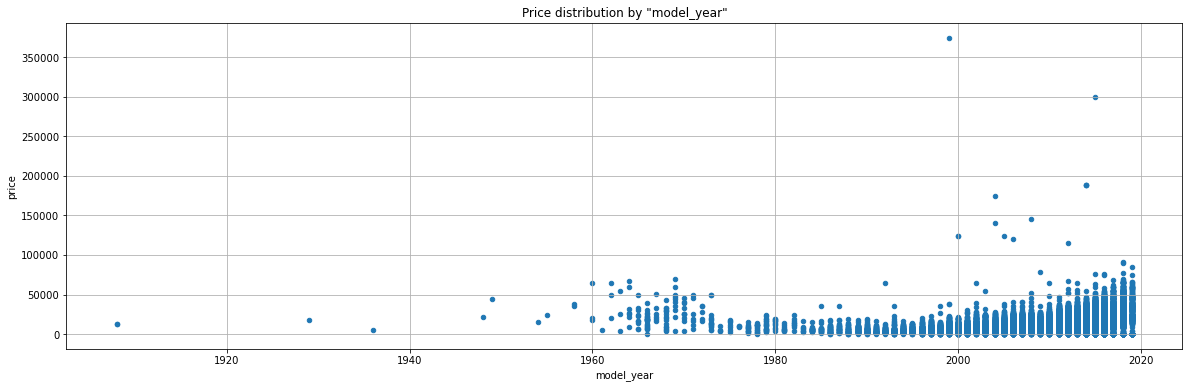

In [37]:
# Analizando densidad de precios para ajustar rangos
df.plot(x='model_year',y='price',kind='scatter',grid=True,figsize=(20,6),title='Price distribution by "model_year"')

De acuerdo con la gráfica de densidad (scatter) nos podemos dar cuenta que la mayor concentración de precios esta entre `0` y `100000` para todos los `model_year`, por lo que de entrada podríamos considerar como valores atípicos para `price` aquellos que estan por encima de `100000` y por debajo de `1000`.

<AxesSubplot:title={'center':'Odometer distribution by "model_year"'}, xlabel='model_year', ylabel='odometer'>

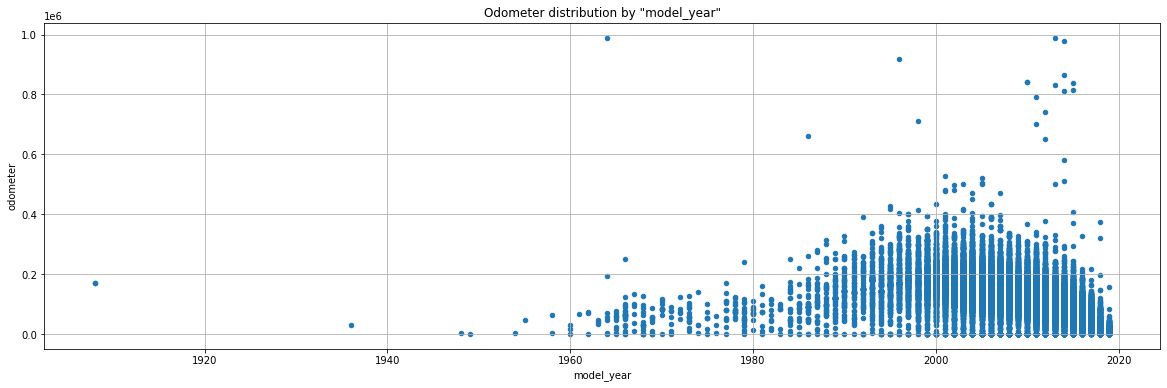

In [38]:
# Analizando densidad de millaje para ajustar rangos
df.plot(x='model_year',y='odometer',kind='scatter',grid=True,figsize=(20,6),title='Odometer distribution by "model_year"')

Para el caso de las millas registradas de igual manera podemos observar que la nube se concentra entre `0` y `4000000` por lo que podríamos considerar como valores atípicos todos aquellos registros que tienen un millaje por encima de este rango.

In [39]:
df_model_year = df[(df['price'] > 1000) & (df['price'] < 100000) & (df['odometer'] < 400000) & (df['model_year'].isna() == False)]
df_model_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39485 entries, 0 to 44095
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          39485 non-null  int64  
 1   model_year     39485 non-null  float64
 2   model          39485 non-null  object 
 3   condition      39485 non-null  object 
 4   cylinders      39485 non-null  float64
 5   fuel           39485 non-null  object 
 6   odometer       39485 non-null  float64
 7   transmission   39485 non-null  object 
 8   type           39485 non-null  object 
 9   paint_color    31719 non-null  object 
 10  is_4wd         39485 non-null  float64
 11  date_posted    39485 non-null  object 
 12  days_listed    39485 non-null  int64  
 13  cat_condition  39485 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 4.5+ MB


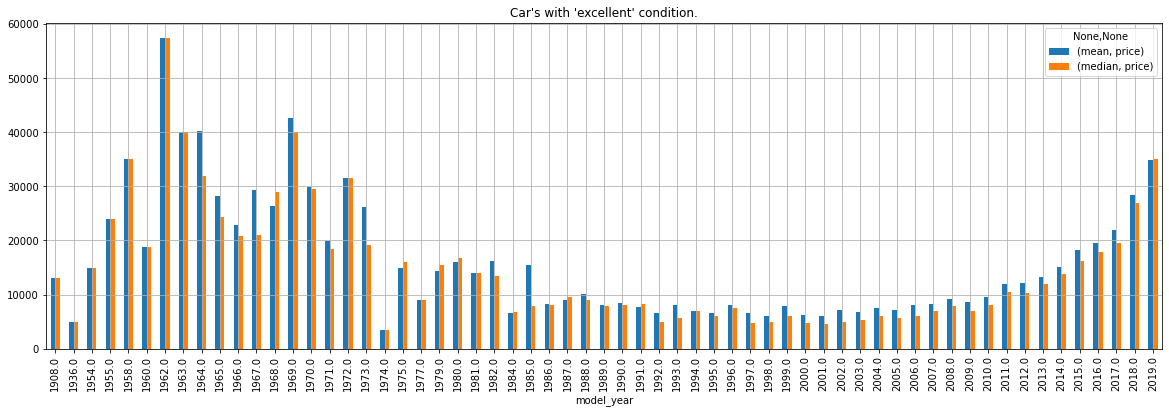

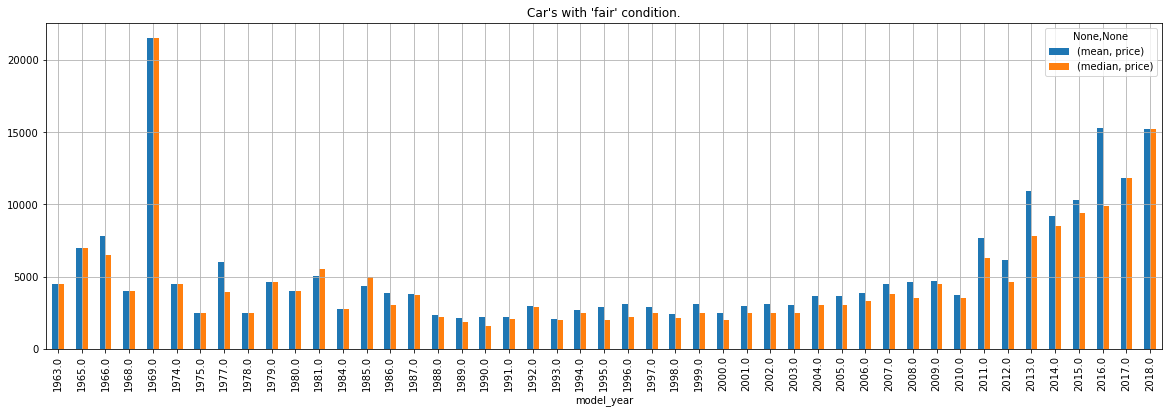

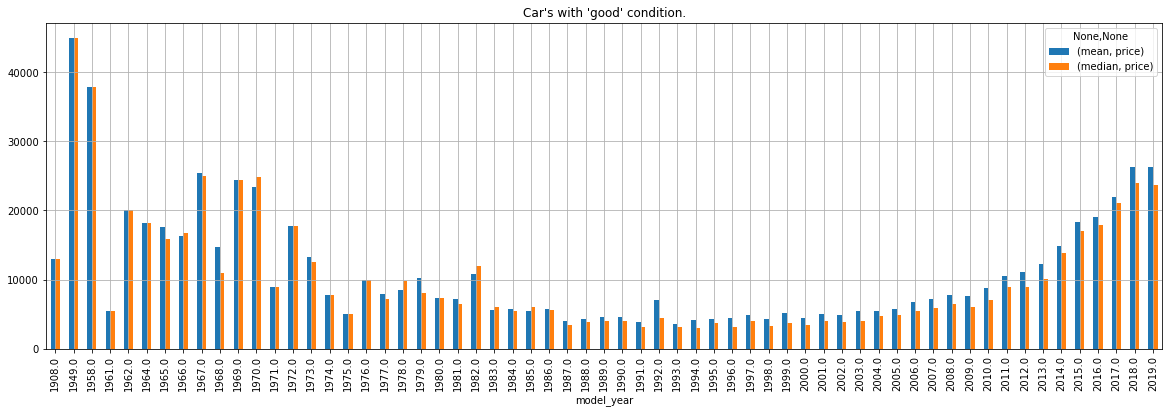

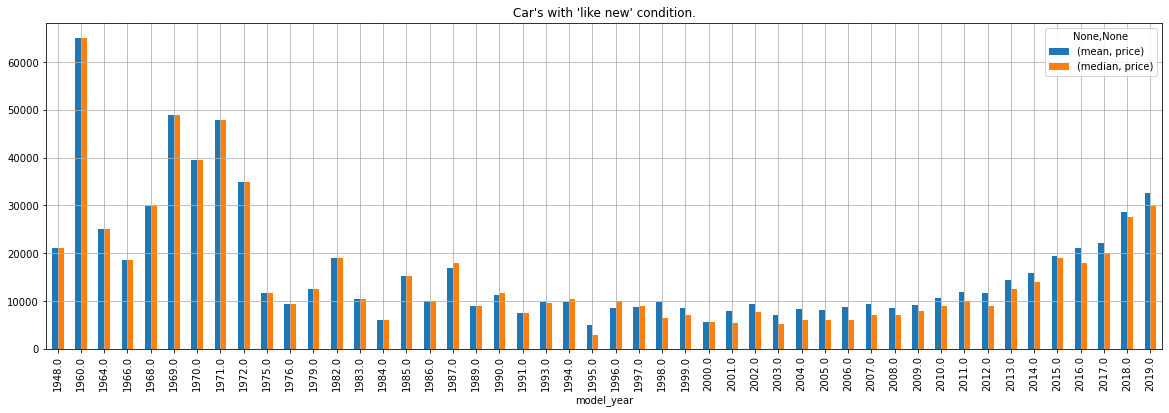

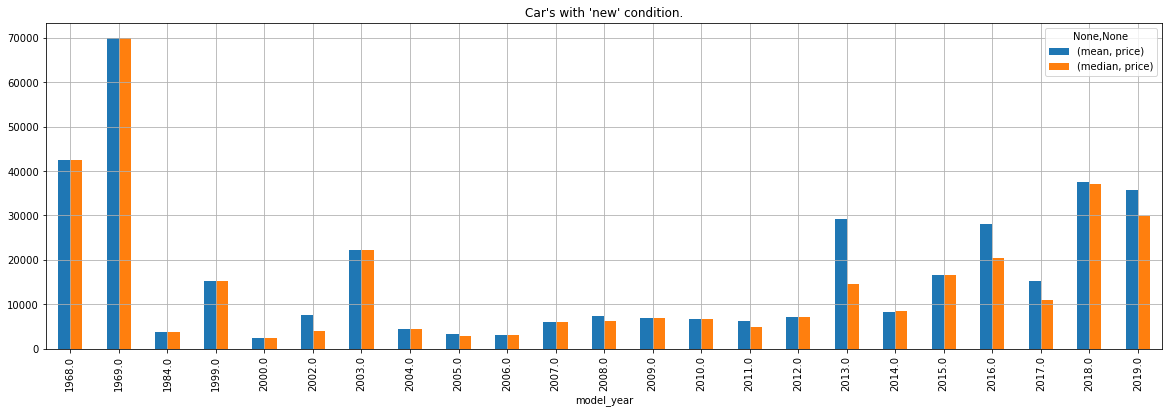

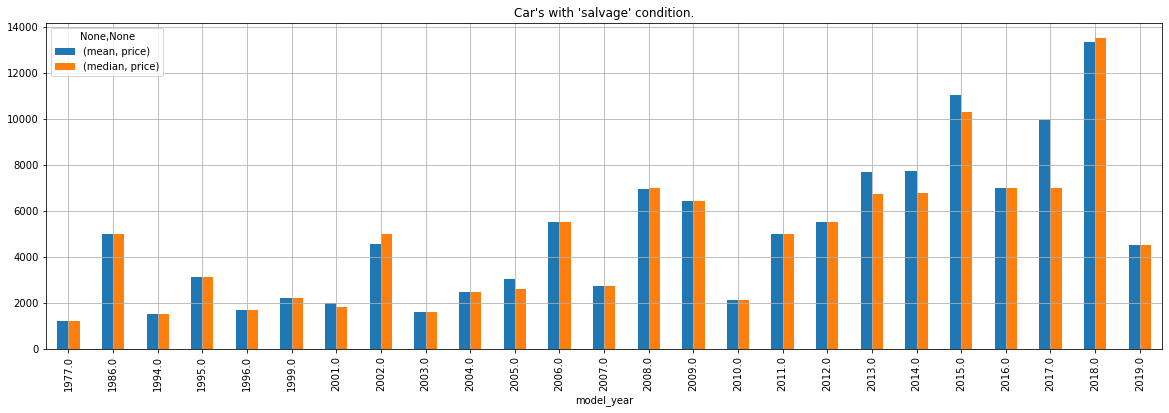

In [40]:
# Analizando relacion entre columnas de "df_model_year" respecto a "price"

for condition, table in df_model_year.groupby('condition'):
    table.pivot_table(index='model_year',values='price',aggfunc=['mean','median']).plot(kind='bar',figsize=(20,6),grid=True,title=f"Car's with '{condition}' condition.")

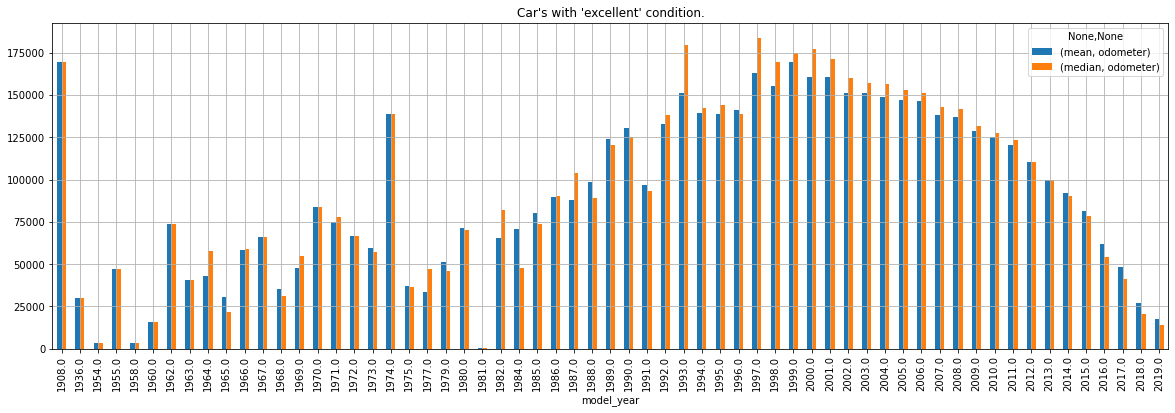

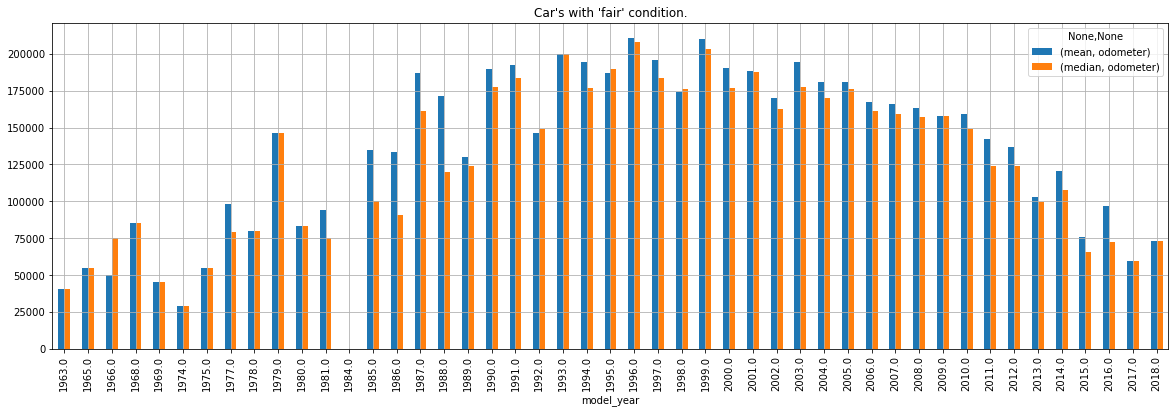

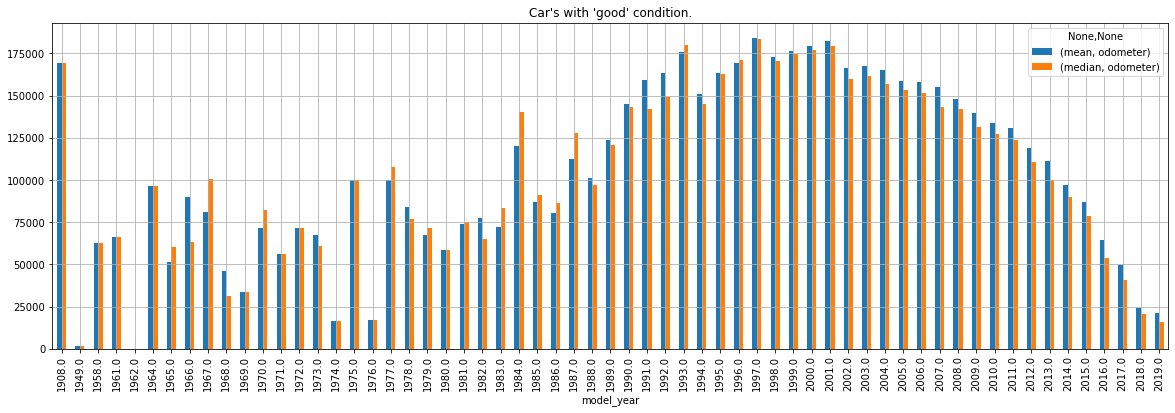

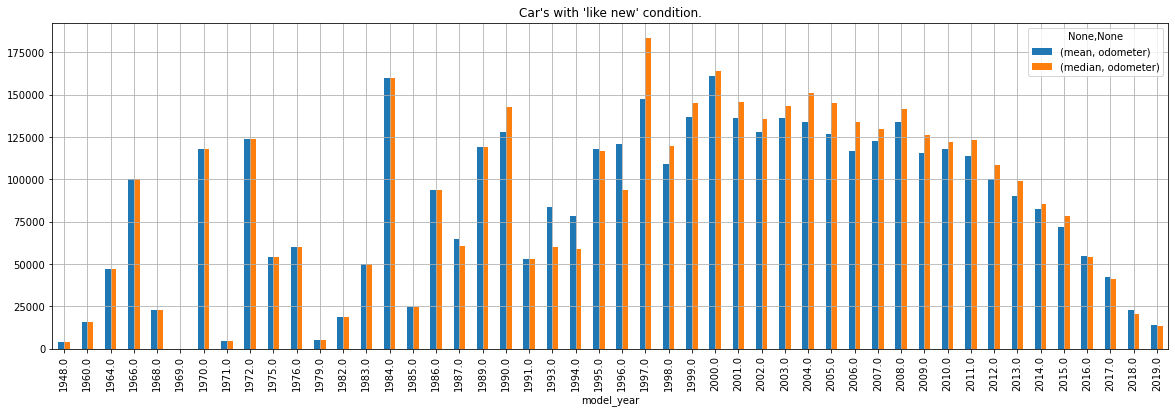

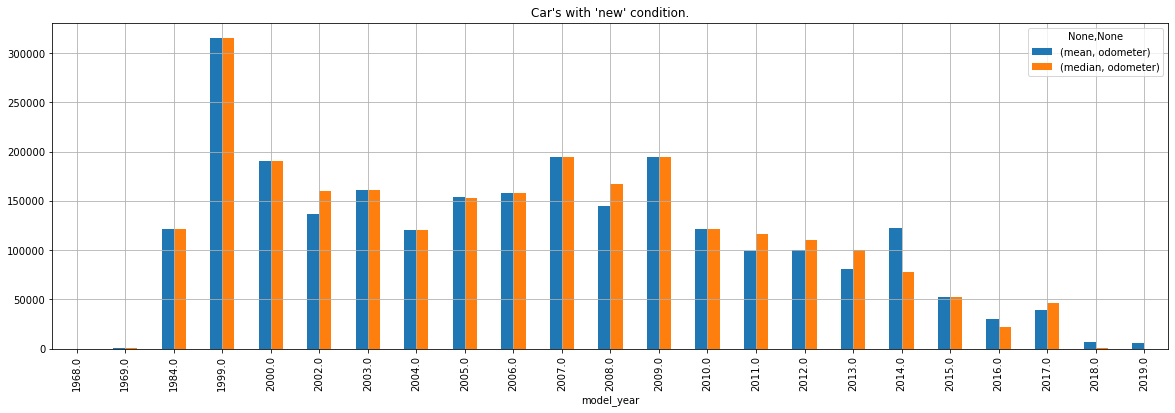

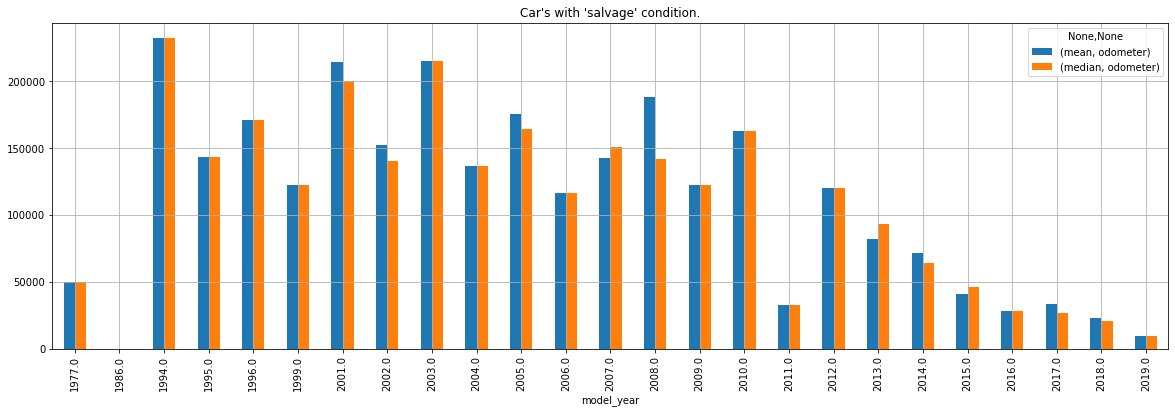

In [41]:
# Analizando relacion entre columnas de "df_model_year" respecto a "odometer"
for condition, table in df_model_year.groupby('condition'):
    table.pivot_table(index='model_year',values='odometer',aggfunc=['mean','median']).plot(kind='bar',figsize=(20,6),grid=True,title=f"Car's with '{condition}' condition.")

Basado en los resultados anteriores, podemos concluir:
- Para el caso de `price`

Tanto la moda como la media, en la mayoría de los casos nos dan muy similares y para poder usarlos con respecto a los registros nulos de la columna `model_year`, usaremos la mediana, esto porque aunque son muy similares, el promedio en la mayoría de los casos se encuentra por encima de la mediana y esta podría resultar un poco más útil para evitar el sesgo de los datos.

- Para el caso de `odometer`

Es la misma situación anterior, sin embargo, en la mayoría de los casos la mediana esta un poco por encima del promedio pudiendo provocar sesgos más severos en nuestro `df` original.

Por el momento antes de realizar cualquier rellenado de registros, es importante que definamos el rango apropiado porcentual tanto para `price` como para `odometer`.

In [42]:
# Determinando rangos de permisibilidad para los datos en "price"
model_year_median = df_model_year.pivot_table(index='model_year',values='price',aggfunc=['mean','median'])
model_year_median.columns = ['mean_price','median_price']
model_year_median

,mean_price,median_price
model_year,,
1908.0,12995.000000,12995.0
1936.0,5000.000000,5000.0
1948.0,21000.000000,21000.0
1949.0,44900.000000,44900.0
1954.0,15000.000000,15000.0
...,...,...
2015.0,18413.539140,16900.0
2016.0,19775.822824,17942.5
2017.0,21924.341695,19995.0


In [43]:
# Extrayendo rangos totales en "price"
median = []
for idx in model_year_median.index:
    if model_year_median['mean_price'][idx] <= model_year_median['median_price'][idx]:
        median.append(((model_year_median['median_price'][idx] - model_year_median['mean_price'][idx])*100)/model_year_median['median_price'][idx])
    else:
        median.append(((model_year_median['mean_price'][idx] - model_year_median['median_price'][idx])*100)/model_year_median['mean_price'][idx])
        
print('Max median:',max(median))
print('Min median:',min(median))

Max median: 41.46341463414634
Min median: 0.0


In [44]:
# Determinando rangos de permisibilidad para los datos en "odometer"
model_year_mean = df_model_year.pivot_table(index='model_year',values='odometer',aggfunc=['mean','median'])
model_year_mean.columns = ['mean_odometer','median_odometer']
model_year_mean

,mean_odometer,median_odometer
model_year,,
1908.0,169328.000000,169328.0
1936.0,30000.000000,30000.0
1948.0,4000.000000,4000.0
1949.0,1800.000000,1800.0
1954.0,3565.000000,3565.0
...,...,...
2015.0,81677.322333,78514.0
2016.0,61225.637655,54000.0
2017.0,47296.989967,41000.0


In [45]:
# Extrayendo rangos totales en "odometer"
mean = []
for idx in model_year_mean.index:
    if model_year_mean['mean_odometer'][idx] <= model_year_mean['median_odometer'][idx]:
        mean.append(((model_year_mean['median_odometer'][idx] - model_year_mean['mean_odometer'][idx])*100)/model_year_mean['median_odometer'][idx])
    else:
        mean.append(((model_year_mean['mean_odometer'][idx] - model_year_mean['median_odometer'][idx])*100)/model_year_mean['mean_odometer'][idx])
        
print('Max median:',max(mean))
print('Min median:',min(mean))

Max median: 42.32671913609403
Min median: 0.0


De acuerdo con lo anterior, el rango que ocuparemos tanto para `price` como para `odometer` puede ser hasta del 40%, sin embargo, este rango debe ser probado mucho más angosto con la intención de reducir posibilides extra.

In [46]:
# Trabajando con la columna "model_year"
def model_year(row):
    model_year = row['model_year']
    if pd.isna(model_year):
        result =  df_model_year[(df_model_year['price'] <= row['price']*1.05) &
                                (df_model_year['price'] >= row['price']*0.95) &
                                (df_model_year['odometer'] <= row['odometer']*1.05) &
                                (df_model_year['odometer'] >= row['odometer']*0.95) &
                                (df_model_year['model'] == row['model'])]['model_year']
        if result.empty != True:
            return list(result.sort_values(ascending=False))[-1]
    else:
        return row['model_year']
    
df['model_year'] = df.apply(model_year, axis=1)

/var/folders/g2/6f4slx3d02g5s4th9bbb102m0000gn/T/ipykernel_5788/3960295954.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_year'] = df.apply(model_year, axis=1)


In [47]:
# Validando cambios
print(df['model_year'].unique())
df.info()

[2011. 2014. 2013. 2003. 2017. 2015. 2012. 2008. 2018. 2009. 2010. 2004.
 2007. 2005. 2001. 2006. 1966.   nan 1994. 2019. 2000. 2016. 1993. 1999.
 1997. 2002. 1981. 1995. 1996. 1975. 1998. 1985. 1977. 1987. 1974. 1990.
 1992. 1991. 1972. 1967. 1988. 1969. 1989. 1978. 1965. 1979. 1968. 1986.
 1980. 1964. 1963. 1984. 1973. 1982. 1970. 1955. 1971. 1976. 1983. 1954.
 1962. 1948. 1960. 1908. 1961. 1936. 1949. 1958. 1929.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44096 entries, 0 to 44095
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          44096 non-null  int64  
 1   model_year     42785 non-null  float64
 2   model          44096 non-null  object 
 3   condition      44096 non-null  object 
 4   cylinders      44096 non-null  float64
 5   fuel           44096 non-null  object 
 6   odometer       43554 non-null  float64
 7   transmission   44096 non-null  object 
 8   type           44096 non-

In [48]:
# Analizando el caso de la columna `paint_color`
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

<AxesSubplot:xlabel='paint_color'>

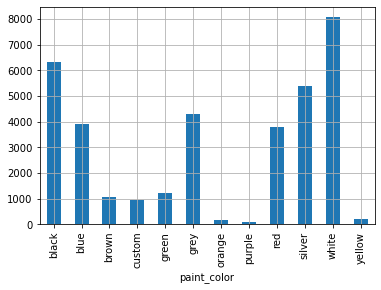

In [49]:
# Graficando frecuencia de colores
df.groupby('paint_color')['price'].count().plot(grid=True,kind='bar')

De acuerdo con la gráfica, podemos observar que hay colores que tienen mucha más demanda con respecto del resto, sin embargo esto puede ser una característica clave para determinar el precio del automovil por lo tanto, ajustaremos estos datos de acuerdo con la información que tenemos, relacionando `model` y `model_year`.

<AxesSubplot:xlabel='paint_color'>

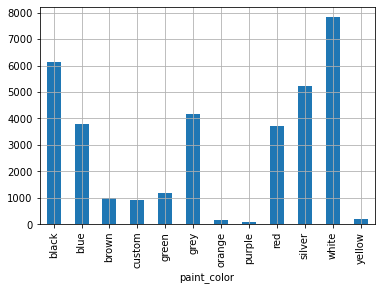

In [50]:
# Obteniendo datos y graficando frecuencia de colores de la tabla filtrada sin valores null en "model_year"
df[df['model_year'].isna() != True].groupby('paint_color')['price'].count().plot(grid=True,kind='bar')

Como podemos observar de la tabla filtrada, tenemos una distribución muy similar en la que de igual forma esta contenida la gama de colores, por ende, partiremos de encontrar los colores por modelo y año del modelo y asignaremos el de mayor frecuencia.

In [51]:
# Añadiendo a "paint_color" los coincidencias encontradas
df_color = df[df['paint_color'].isna() != True]
def set_paint_color(row):
    global df_color
    paint_color = row['paint_color']
    if pd.isna(paint_color):
        result = df_color[(df_color['model'] == row['model']) & (df_color['model_year'] == row['model_year'])]
        if result.empty != True:
            return list(result['paint_color'].sort_values(ascending=False))[0]
    else:
        return row['paint_color']

df['paint_color'] = df.apply(set_paint_color, axis=1)

/var/folders/g2/6f4slx3d02g5s4th9bbb102m0000gn/T/ipykernel_5788/946852164.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['paint_color'] = df.apply(set_paint_color, axis=1)


In [52]:
# Comprobando resultados
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,white,1.0,2018-06-23,19,2.0
1,25500,2014.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,4.0
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,white,0.0,2019-03-22,9,1.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,4.0
44092,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,0.0
44093,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3.0
44094,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2.0


Al realizar este procedimiento nos quedamos con el mínimo de registros para los que se debe buscar una solución.

En conclusión hasta este punto:
- Pudimos reducir la cantidad de datos duplicados al detectarse que si bien, no coinicidian en `date_posted` y `days_listed`, si lo hicierón en el resto por lo que se dedujo que habían sido registros duplicados del mismo automóvil, por ende, se prodeció a eliminar aquellas coincidencias obvias.
- Se identificarón caso atípicos en los que los valores tanto `odometer` como `price` se encontraban muy por encima de los rangos de mayor concentración y por ende, provocaban sesgos en el resto de la información, por esta razón, se excluyerón del análisis para completar la columna `model_year`.
- Si bien se pudierón trabajar con algunos registros nulos, no se pudo trabajar con todos, esto es debido a que la información contenida no fue suficiente o salió por completo del rango considerado.

## Corregir los tipos de datos



Ahora procederemos a hacer la corrección del tipo de datos para las distintas columnas que lo requiere y estas son: 
- `model_year`: pasará de `float64` a `int64`
- `cylinders`: pasará de `float64` a `int64`
- `odometer`: pasará de `float64` a `int64`
- `is_4wd`: pasará de `float64` a `bool`
- `date_posted`: pasará de `object` a `datetime`

Debemos resaltar que en aquellas columnas en las que se tienen aun valores `nan` no podremos realizar cambios, por ende, generaremos un nuevo `df` con el cual trabajaremos de aquí en adelante. 

In [53]:
# Corrigiendo los tipos de datos que pasarán de "float64" a "int64"
#df = df[(df['model_year'].isna() != True) & (df['odometer'].isna() != True)]
df = df.astype({'model_year': 'int64','cylinders': 'int64','odometer': 'int64'},errors='ignore')

In [54]:
# Corrigiendo los tipos de datos que pasarán de "float64" a "bool"
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] == 0.0,True)
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] == True,False)
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,2.0
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2.0
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4.0
3,1500,2003.0,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,False,2019-03-22,9,1.0
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,9249,2013.0,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4.0
44092,2700,2002.0,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,0.0
44093,3950,2009.0,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3.0
44094,7455,2013.0,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2.0


In [55]:
# Corrigiendo los tipos de datos que pasarán de "object" a "datetime"
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44096 entries, 0 to 44095
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          44096 non-null  int64         
 1   model_year     42785 non-null  float64       
 2   model          44096 non-null  object        
 3   condition      44096 non-null  object        
 4   cylinders      44096 non-null  int64         
 5   fuel           44096 non-null  object        
 6   odometer       43554 non-null  float64       
 7   transmission   44096 non-null  object        
 8   type           44096 non-null  object        
 9   paint_color    43816 non-null  object        
 10  is_4wd         44096 non-null  object        
 11  date_posted    44096 non-null  datetime64[ns]
 12  days_listed    44096 non-null  int64         
 13  cat_condition  44096 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 4.

## Enriquecer datos

Para enriquecer los datos vamos a añadir algunas columnas a nuestro `df` con la intención de tener la mayor cantidad de información disponible a la mano.

In [56]:
# Agrega valores de semana, mes y año en el que se coloco el anuncio
df['date_posted_weekday'] = df['date_posted'].dt.day_name()
df['date_posted_month'] = df['date_posted'].dt.month_name()
df['date_posted_year'] = df['date_posted'].dt.year

df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition,date_posted_weekday,date_posted_month,date_posted_year
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,2.0,Saturday,June,2018
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2.0,Friday,October,2018
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4.0,Thursday,February,2019
3,1500,2003.0,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,False,2019-03-22,9,1.0,Friday,March,2019
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3.0,Tuesday,April,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,9249,2013.0,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4.0,Wednesday,October,2018
44092,2700,2002.0,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,0.0,Wednesday,November,2018
44093,3950,2009.0,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3.0,Thursday,November,2018
44094,7455,2013.0,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2.0,Monday,July,2018


In [57]:
# Agrega los años del vehículo cuando el anuncio se colocó
df['car_years'] = df['date_posted_year'] - df['model_year']
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition,date_posted_weekday,date_posted_month,date_posted_year,car_years
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,2.0,Saturday,June,2018,7.0
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2.0,Friday,October,2018,4.0
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4.0,Thursday,February,2019,6.0
3,1500,2003.0,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,False,2019-03-22,9,1.0,Friday,March,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3.0,Tuesday,April,2019,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,9249,2013.0,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4.0,Wednesday,October,2018,5.0
44092,2700,2002.0,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,0.0,Wednesday,November,2018,16.0
44093,3950,2009.0,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3.0,Thursday,November,2018,9.0
44094,7455,2013.0,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2.0,Monday,July,2018,5.0


In [58]:
# Agrega el millaje promedio del vehículo por año
def mean_odometer(row):
    if row['car_years'] != 0:
        return row['odometer'] / row['car_years']
    else:
        return row['odometer']
    
df['mean_odometer_per_year'] = df.apply(mean_odometer, axis=1)

In [59]:
# Comprobando resultados de "mean_odometer_per_year"
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition,date_posted_weekday,date_posted_month,date_posted_year,car_years,mean_odometer_per_year
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,2.0,Saturday,June,2018,7.0,20714.285714
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2.0,Friday,October,2018,4.0,22176.250000
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4.0,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,False,2019-03-22,9,1.0,Friday,March,2019,16.0,10087.312500
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3.0,Tuesday,April,2019,2.0,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,9249,2013.0,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4.0,Wednesday,October,2018,5.0,17627.200000
44092,2700,2002.0,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,0.0,Wednesday,November,2018,16.0,11343.750000
44093,3950,2009.0,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3.0,Thursday,November,2018,9.0,14222.222222
44094,7455,2013.0,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2.0,Monday,July,2018,5.0,27914.600000


## Comprobar datos limpios


Al tener los datos limpios y listos para trabajar, no esta de más, revisarlos nuevamente con la intención de que todas las columnas esten bien etiquetadas, contengan el tipo de dato correcto, etc.

In [60]:
# imprime la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44096 entries, 0 to 44095
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   44096 non-null  int64         
 1   model_year              42785 non-null  float64       
 2   model                   44096 non-null  object        
 3   condition               44096 non-null  object        
 4   cylinders               44096 non-null  int64         
 5   fuel                    44096 non-null  object        
 6   odometer                43554 non-null  float64       
 7   transmission            44096 non-null  object        
 8   type                    44096 non-null  object        
 9   paint_color             43816 non-null  object        
 10  is_4wd                  44096 non-null  object        
 11  date_posted             44096 non-null  datetime64[ns]
 12  days_listed             44096 non-null  int64 

In [61]:
# imprimir una muestra de datos
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition,date_posted_weekday,date_posted_month,date_posted_year,car_years,mean_odometer_per_year
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,2.0,Saturday,June,2018,7.0,20714.285714
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2.0,Friday,October,2018,4.0,22176.250000
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4.0,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,False,2019-03-22,9,1.0,Friday,March,2019,16.0,10087.312500
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3.0,Tuesday,April,2019,2.0,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,9249,2013.0,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4.0,Wednesday,October,2018,5.0,17627.200000
44092,2700,2002.0,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,0.0,Wednesday,November,2018,16.0,11343.750000
44093,3950,2009.0,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3.0,Thursday,November,2018,9.0,14222.222222
44094,7455,2013.0,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2.0,Monday,July,2018,5.0,27914.600000


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

[Si te das cuenta que necesitas repetir los mismos trabajos varias veces, piensa qué instrumento de programación podría ser útil para evitar duplicar tu código.]

<AxesSubplot:ylabel='Frequency'>

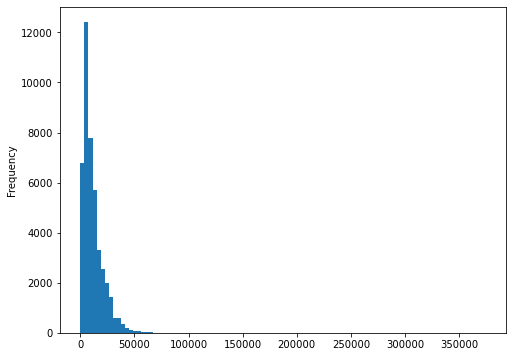

In [62]:
# Graficando la columna "price"
df['price'].plot.hist(bins=100,figsize=(8,6))

Como podemos observar, y como anteriormente ya se ha mencionado, la mayor concentración de precios de los automóviles se encuentra entre `0` y `50000` condierando el resto como valores atípicos, sin embargo estos valores pudierón haber afectado de manera considerable la columna `mean_odometer_per_year` pues si ponemos atención a la cola de la distribución podemos decir con seguridad que al menos un dato esta sobre `350000` o posiblemente mayor.

<AxesSubplot:ylabel='Frequency'>

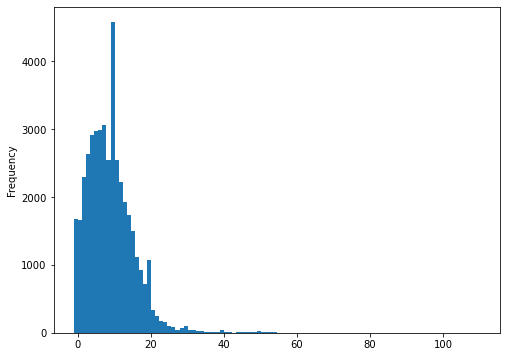

In [63]:
# Graficando la columna "car_year"
df['car_years'].plot.hist(bins=100,figsize=(8,6))

Para el caso de `car_years` podemos ver claramente que la concentración de la distribución se encuentra entre `0` y `20` años, es decir, si nuestro `df` tiene como año más reciente `2019`, entonces lo más probable es que el modelo del auto que se este buscando se encuentra entre `1999` y `2019`, cabe resaltar también que la cola del histograma muestra una pequeña barra por encima de `80` años de antigüedad llegando incluso a tener `100`. Estos valores si bien son posibles, sería buena opción observarlos más a detalle tal vez uno a uno si la información lo permite.

<AxesSubplot:ylabel='Frequency'>

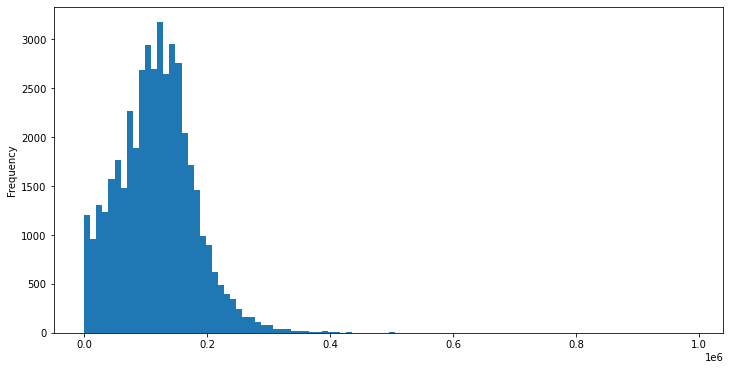

In [64]:
# Graficando la columna "odometer"
df['odometer'].plot.hist(bins=100,figsize=(12,6))

Al tratarse de `odometer`, tenemos un par de observaciones.
- Podemos observar que la concentración de millas recorridas se encuentra entre `0` y `300000` millas, sin embargo, hay que resaltar que una cantidad considerable tiene registrado `0` millas, lo cual al momento de hacer el promedio de `mean_odometer_per_year` afecta considerablemente la muestra y por ende el calculo del promedio de millaje por año.
- Por otro lado aparentemente se tiene al menos un registro con `1000000` de millas recorridas o un poco más lo cual podría considerar un valor atípico pues la distancia recorrida es excesiva.

<AxesSubplot:ylabel='Frequency'>

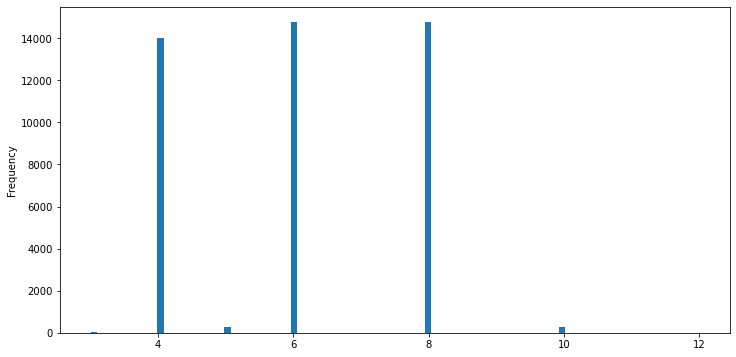

In [65]:
# Graficando la columna "cylinders"
df['cylinders'].plot.hist(bins=100,figsize=(12,6))

En cuanto al cilindraje de los vehículos podemos observar que prácticamente la distribución se encuentra entre `4`, `6` y `8` cilindros sin embargo también tenemos de `3`, `5`, `10` e incluso `12`, si bien este caso aparentemente tiene valores atípicos, estos no lo son puesto que la columna es categórica, por tal motivo, no consideraría crítico este resultado en específico.

<AxesSubplot:ylabel='Frequency'>

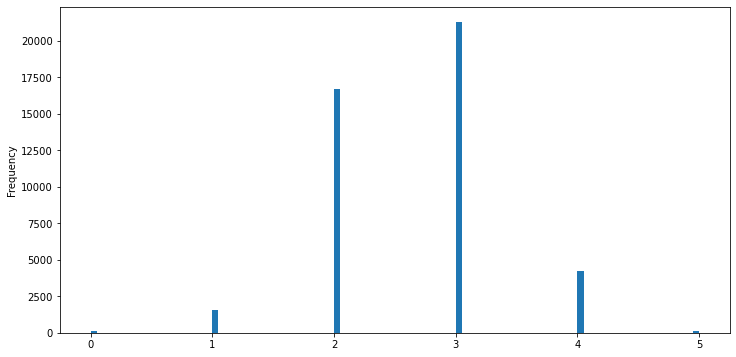

In [66]:
# Graficando la columna "condition"
df['cat_condition'].plot.hist(bins=100,figsize=(12,6))

Para este caso, podemos observar que las categorías estan cargadas principalmente en `2` y generalmente en `4` quedando de la siguiente manera de forma descendente:
- `excelente`
- `bien`
- `como nuevo`
- `bastante`

Dado esta situación podriamos considerar englobar las categorías `nuevo` en `excelente` o bien `nuevo` y `fair` en una categoría aparte.

Considero que para este punto, es importante no nada más la visualización de histogramas por característica en específico, si no también considerar algunas combinaciones con la intención de detectar posibles patrones que no se ven a simple vista.

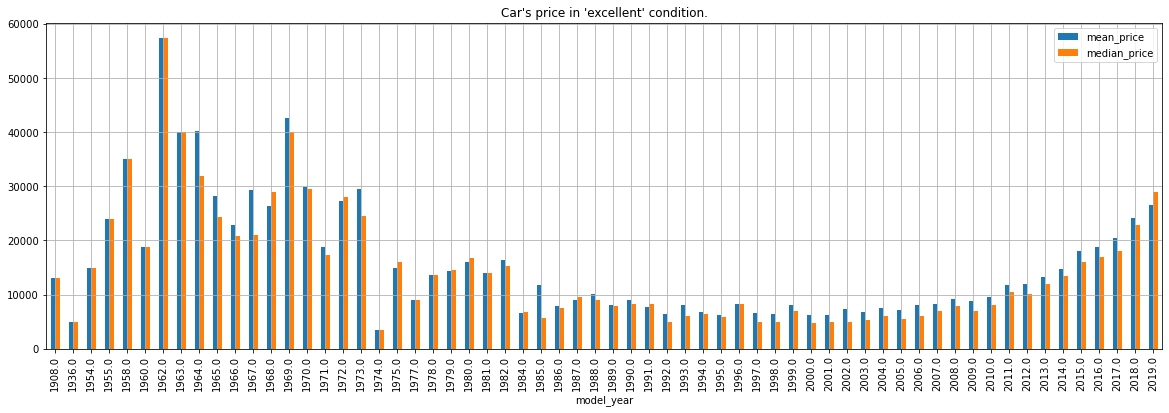

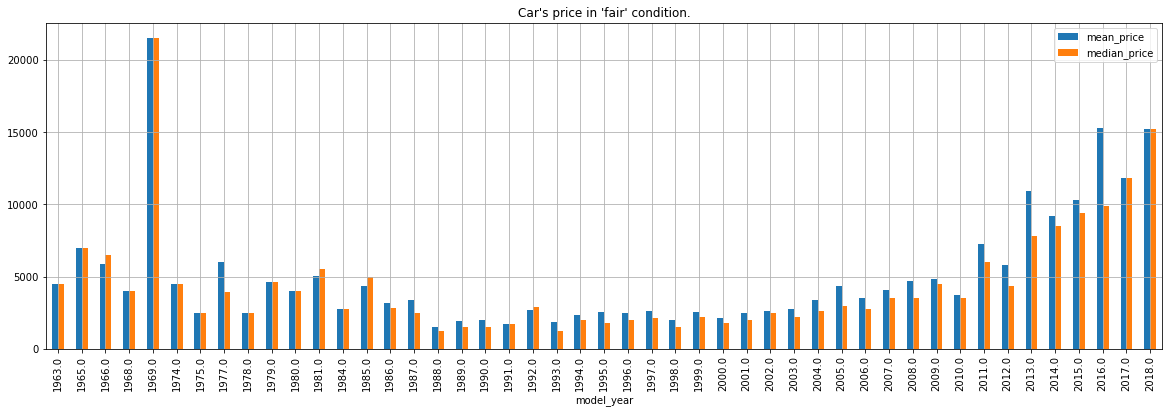

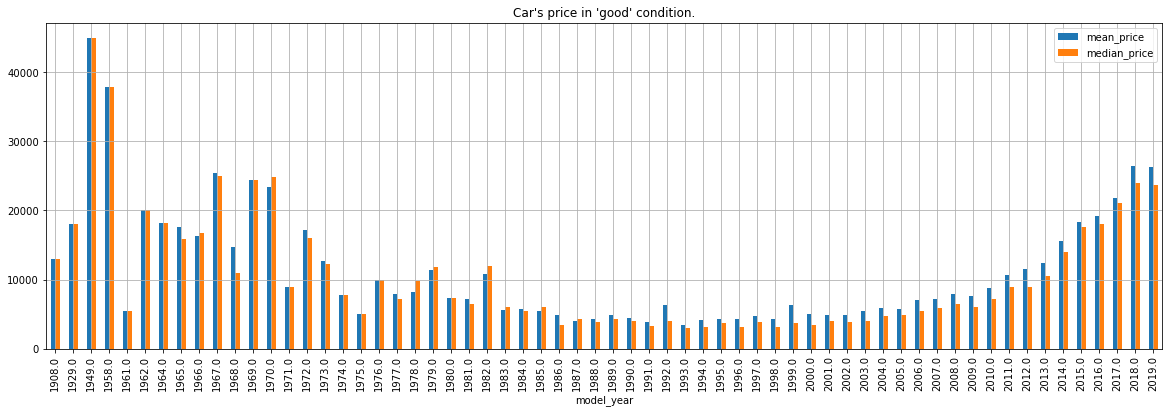

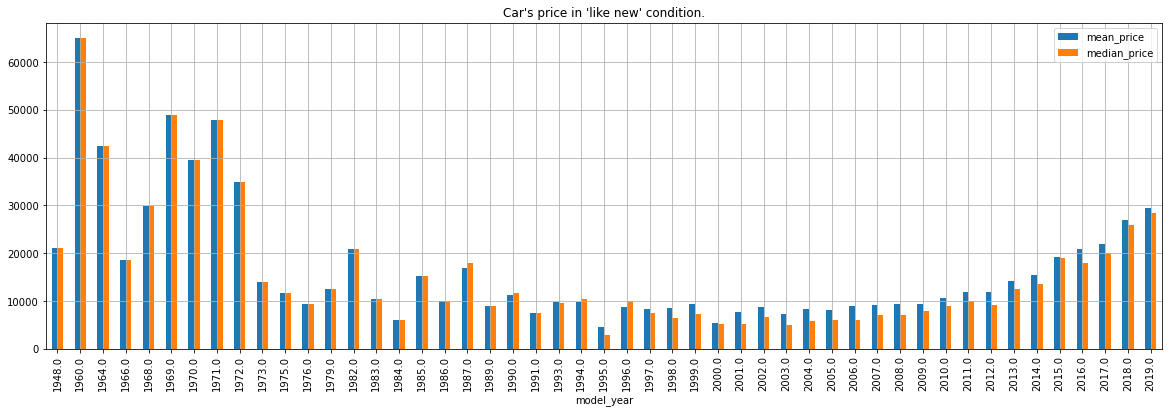

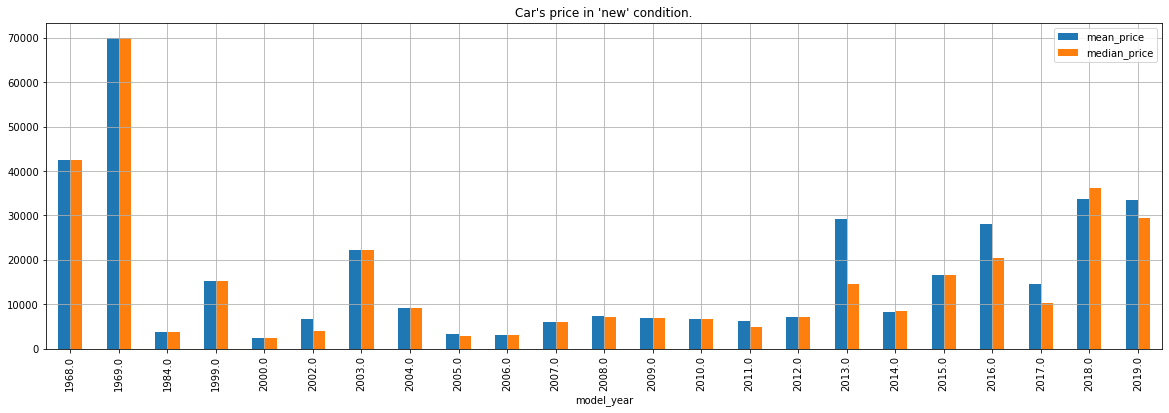

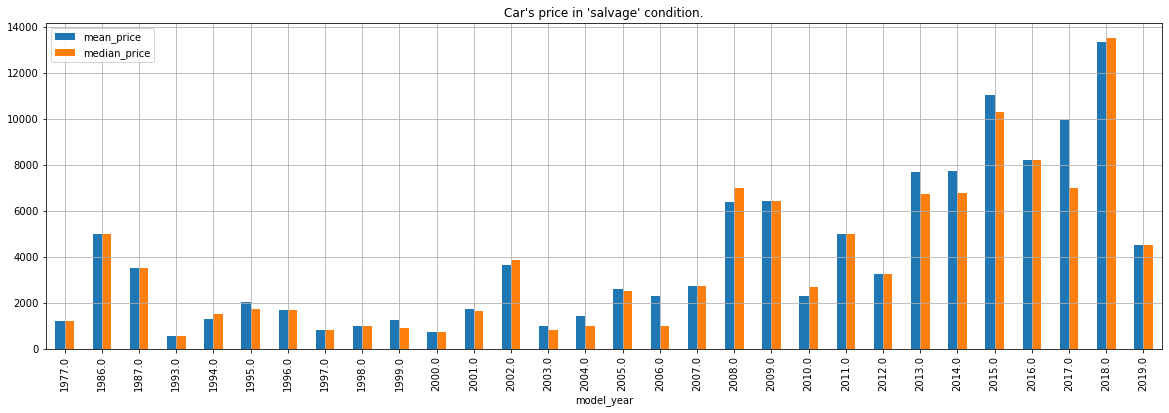

In [67]:
# Graficando "mean" y "median" de "price" por año de acuerdo a "condition"
for condition, table in df.groupby('condition'):
    price_table = table.pivot_table(index='model_year',values='price',aggfunc=['mean','median'])
    price_table.columns = ['mean_price','median_price']
    price_table.plot(kind='bar',figsize=(20,6),grid=True,title=f"Car's price in '{condition}' condition.")

Estas gráficas nos permiten observar que opareciera ser que hay algunas irregularidades en los precios tanto promedios como medianos independientemente de en que condición se encuentren se aprecia que en años entre `1908` y `1989` se encuentran disparados los precios sin partones aparentes. En años posteriores a `1989` la curva refleja simetría y tal vez obviedad pues a modelos más recientes sería congruente que el precio sea más elevado.

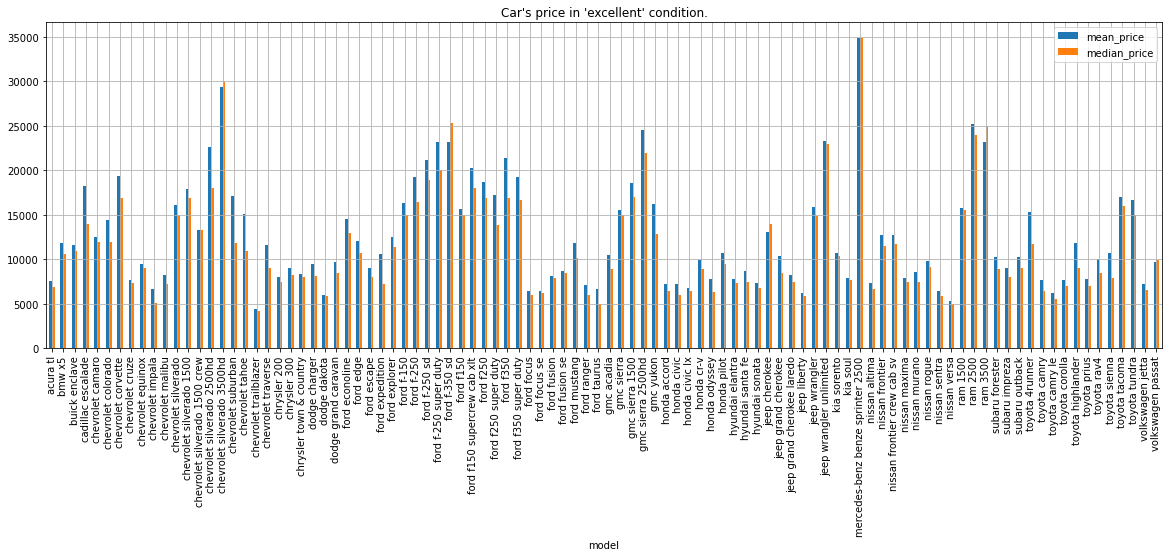

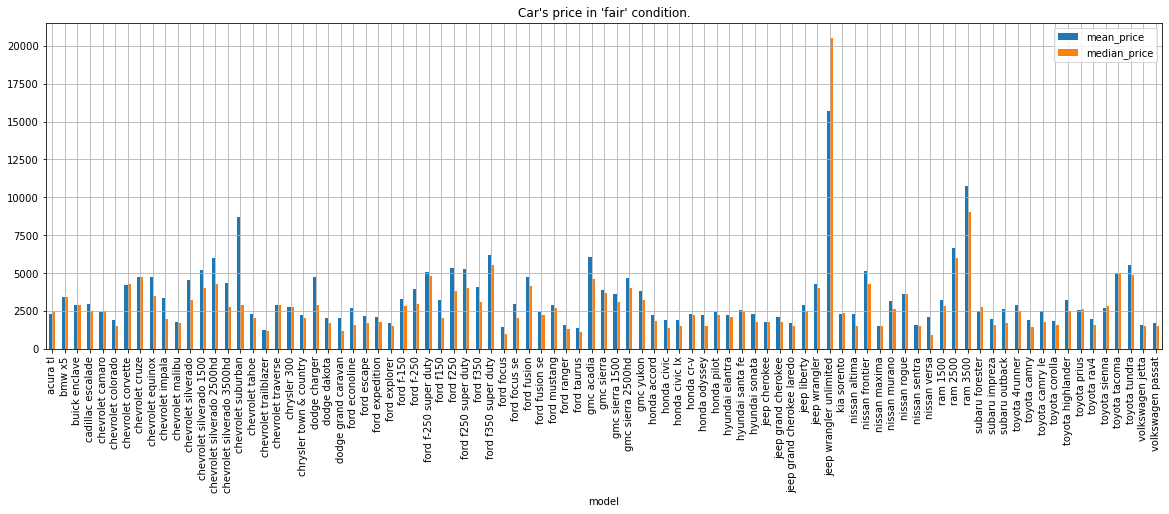

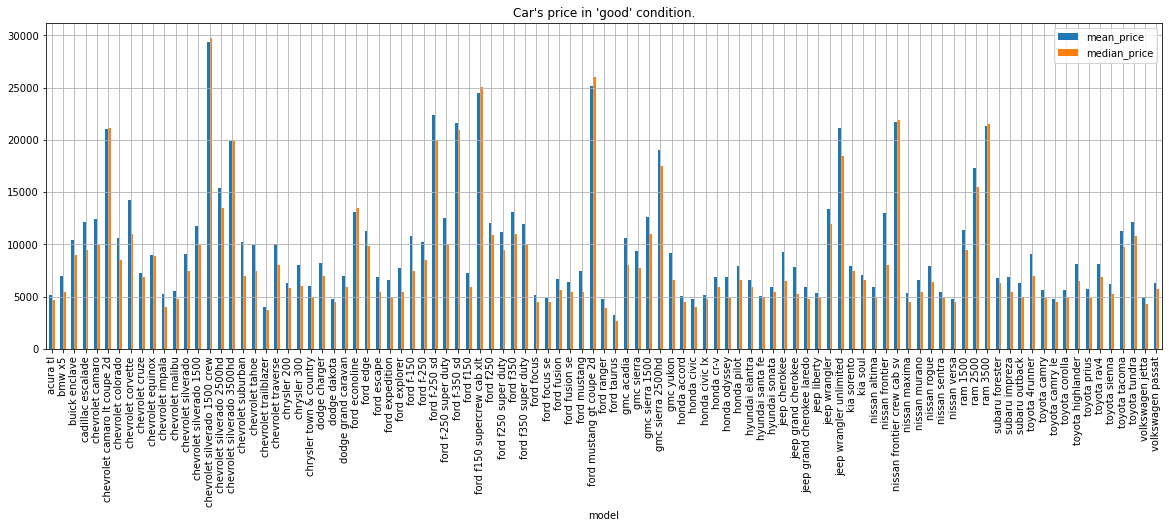

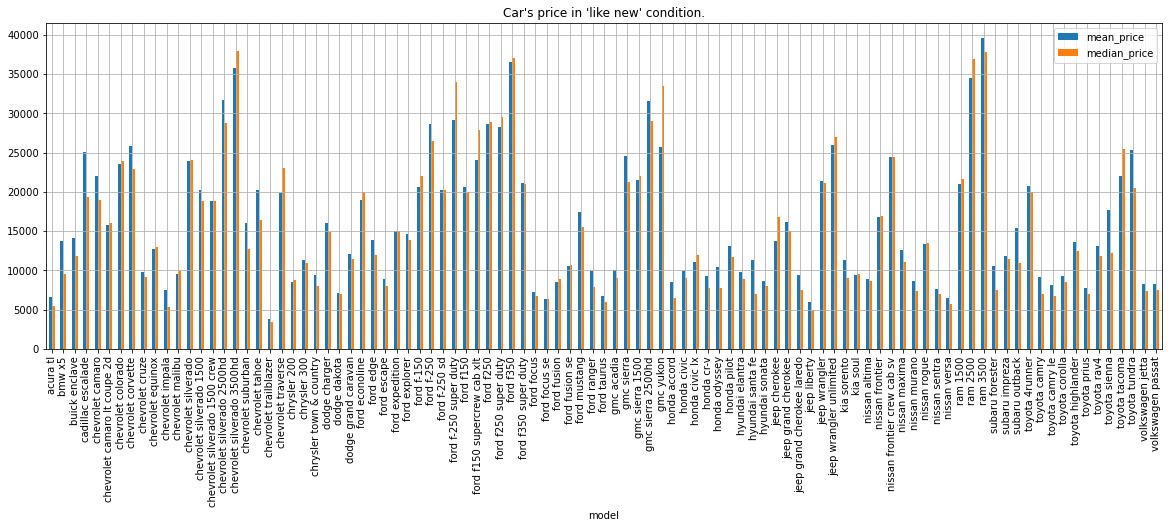

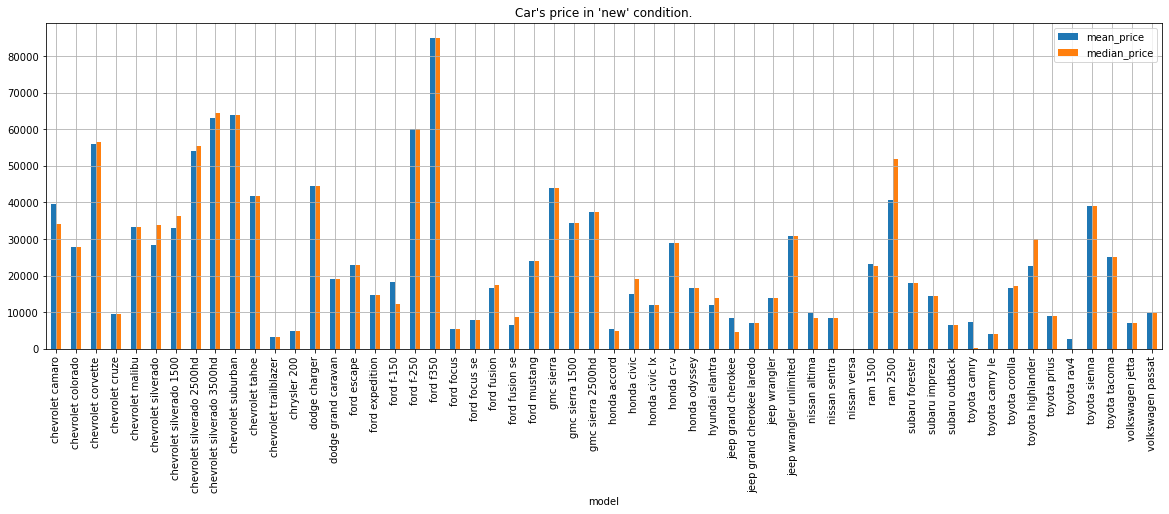

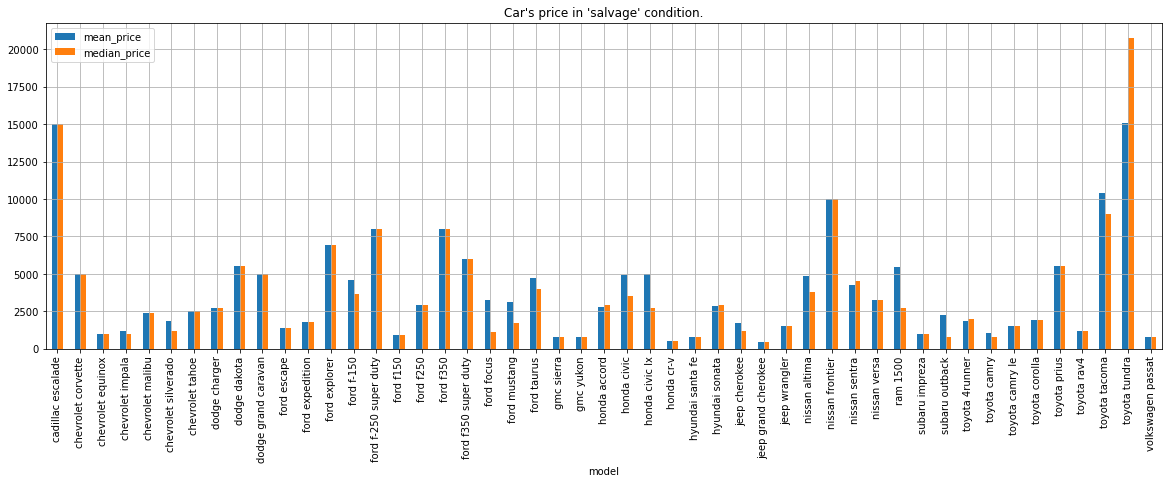

In [68]:
# Graficando "mean" y "median" de "price" por modelo de acuerdo a "condition"
for condition, table in df.groupby('condition'):
    price_table = table.pivot_table(index='model',values='price',aggfunc=['mean','median'])
    price_table.columns = ['mean_price','median_price']
    price_table.plot(kind='bar',figsize=(20,6),grid=True,title=f"Car's price in '{condition}' condition.")

Por otro lado al mostrar los precios por modelo, en general tienen una congruencia en los precios en cuanto a promedio y mediana sin embargo esto no nos garantiza que se aplique de la misma manera en todos los casos, por ejemplo para el caso de `jeep. weangler unlimited` en condiciones de `rescate`, la mediana esta muy disparada lo que nos podría indicar precios muy por debajo o incluso cero al punto de afectar la muestra, por otro lado tenemos `chevrolet suburban` en donde el promedio esta muy por encima de la mediana lo cual nos indica que hay valores muy por encima del promedio y provocan sensgos en las muestras.

Estas conclusiones son meramente visualies de acuerdo con las graficas, valores promedio y medianos respecto al precio.

## Estudiar y tratar valores atípicos

[Con los resultados anteriores, determina qué columnas pueden contener valores atípicos y crea un DataFrame sin esos valores atípicos. Pista: los valores atípicos se pueden identificar tras definir el límite inferior/superior para el rango normal de valores.]

<AxesSubplot:title={'center':'Price distribution by "model_year"'}, xlabel='model', ylabel='price'>

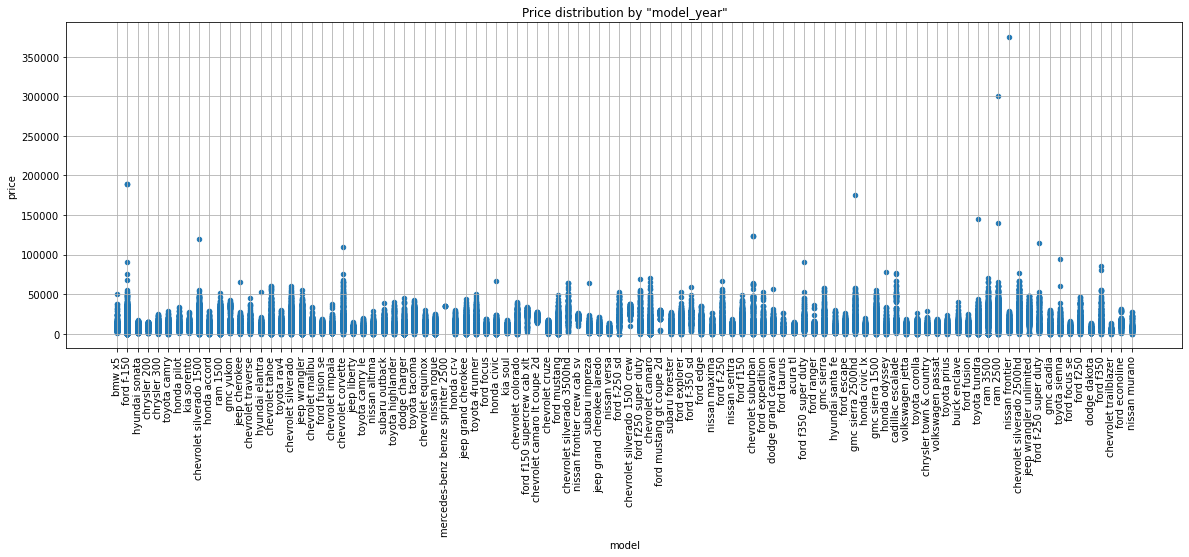

In [69]:
# Determina los límites para valores atípicos en "price" por modelo
df.plot(x='model',y='price',kind='scatter',grid=True,figsize=(20,6),title='Price distribution by "model_year"',rot=90)

Al visualizar la gráfica de densidad de precios con respecto al modelo, nos percatamos que se encuentra entre rangos de `0` a `100000`, sin embargo nos encontramos con otro problema y es que ¿Porqué tendrian precio de 0 la mayoría de los modelos en este `df`?

In [70]:
# Validando cantidad de registros en los que el precio es de 0 o 1
df[(df['price'] == 0) | (df['price'] == 1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition,date_posted_weekday,date_posted_month,date_posted_year,car_years,mean_odometer_per_year
399,1,2014.0,chevrolet camaro,excellent,6,gas,71310.0,automatic,coupe,yellow,False,2018-07-14,29,3.0,Saturday,July,2018,4.0,17827.500000
2960,1,1998.0,chevrolet silverado,good,8,gas,164000.0,automatic,pickup,white,True,2018-10-11,49,2.0,Thursday,October,2018,20.0,8200.000000
3634,1,2007.0,chevrolet tahoe,good,8,gas,200.0,automatic,SUV,red,False,2019-03-18,63,2.0,Monday,March,2019,12.0,16.666667
3727,1,1996.0,ford f-150,fair,6,gas,163000.0,manual,truck,white,False,2019-02-23,54,1.0,Saturday,February,2019,23.0,7086.956522
3949,1,2004.0,chevrolet silverado,excellent,8,diesel,83000.0,automatic,pickup,white,True,2019-02-04,14,3.0,Monday,February,2019,15.0,5533.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42565,1,2007.0,chevrolet trailblazer,excellent,8,gas,143000.0,automatic,SUV,black,True,2018-08-06,28,3.0,Monday,August,2018,11.0,13000.000000
42574,1,NaN,ford f150,excellent,8,gas,139700.0,other,pickup,red,True,2019-03-11,18,3.0,Monday,March,2019,NaN,NaN
43024,1,1986.0,chevrolet silverado,good,8,gas,90420.0,automatic,truck,red,True,2018-11-30,50,2.0,Friday,November,2018,32.0,2825.625000
43155,1,2003.0,gmc sierra 2500hd,good,8,diesel,212300.0,automatic,pickup,black,True,2019-04-12,28,2.0,Friday,April,2019,16.0,13268.750000


Nos encontramos con que `414` registros tienen el valor de `1` como precio lo cuál me da a pensar que posiblemente se trate de personas que quieran recibir ofertas por sus automóviles.

Por otro lado, investigaremos a fondo que es lo que sucede cuando buscamos registros que esten por debajo de un precio de `1000`

In [71]:
# Validando cantidad de registros en los que el precio esta por debajo de 1000
df[(df['price'] < 1000) & (df['price'] != 1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition,date_posted_weekday,date_posted_month,date_posted_year,car_years,mean_odometer_per_year
217,500,2004.0,toyota corolla,like new,4,gas,156640.0,automatic,sedan,blue,False,2018-09-17,24,4.0,Monday,September,2018,14.0,11188.571429
311,600,1999.0,toyota camry le,salvage,4,gas,216348.0,automatic,sedan,white,False,2019-03-04,23,0.0,Monday,March,2019,20.0,10817.400000
326,500,2004.0,toyota corolla,like new,4,gas,226980.0,automatic,sedan,white,False,2018-09-19,19,4.0,Wednesday,September,2018,14.0,16212.857143
400,288,2018.0,nissan altima,excellent,4,gas,40277.0,automatic,sedan,silver,False,2018-10-19,37,3.0,Friday,October,2018,0.0,40277.000000
402,700,2000.0,ford focus,fair,4,gas,221000.0,manual,sedan,blue,False,2018-05-18,38,1.0,Friday,May,2018,18.0,12277.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43500,299,NaN,toyota camry,excellent,4,gas,185634.0,automatic,sedan,silver,False,2019-01-31,39,3.0,Thursday,January,2019,NaN,NaN
43519,475,2018.0,gmc sierra 1500,like new,8,gas,6500.0,automatic,truck,black,True,2018-07-10,18,4.0,Tuesday,July,2018,0.0,6500.000000
43630,10,2012.0,toyota prius,excellent,4,hybrid,101000.0,automatic,hatchback,green,False,2019-03-16,29,3.0,Saturday,March,2019,7.0,14428.571429
43736,700,2001.0,honda civic,fair,4,gas,150000.0,manual,sedan,blue,False,2018-08-07,81,1.0,Tuesday,August,2018,17.0,8823.529412


<AxesSubplot:title={'center':'Price distribution by "model"'}, xlabel='model', ylabel='price'>

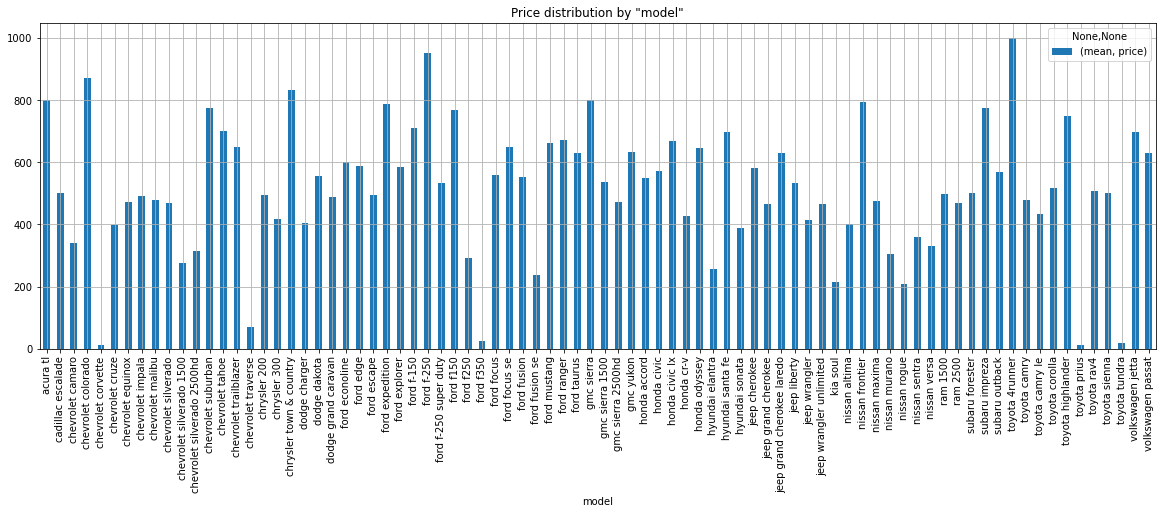

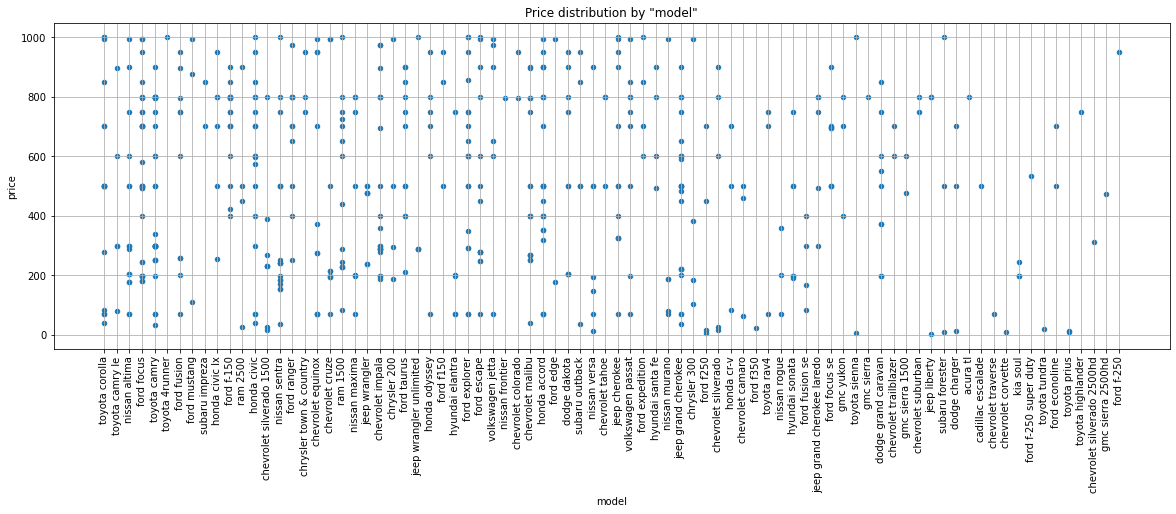

In [72]:
# Visualicemos la distribución del df con precios menor o igual a 1000
df[(df['price'] < 1000) & (df['price'] != 1)].pivot_table(index='model',values='price',aggfunc=['mean']).plot(kind='bar',grid=True,figsize=(20,6),title='Price distribution by "model"',rot=90)
df[(df['price'] < 1000) & (df['price'] != 1)].plot(x='model',y='price',kind='scatter',grid=True,figsize=(20,6),title='Price distribution by "model"',rot=90)

Al observar ambas gráficas nos encontramos con que si bien, podemos obtener un promedio de precios, no hay un patrón a seguir para estos casos pues la disperción de precios por debajo de `1000` se encuentra regada por toda el espacio considerado. Por tal motivo y debido a que la cantidad de registros con estas características es de `969` podría considerarse el abordar temas posteriores excluyendolos.

<AxesSubplot:title={'center':'Odometer distribution by "model_year"'}, xlabel='model', ylabel='odometer'>

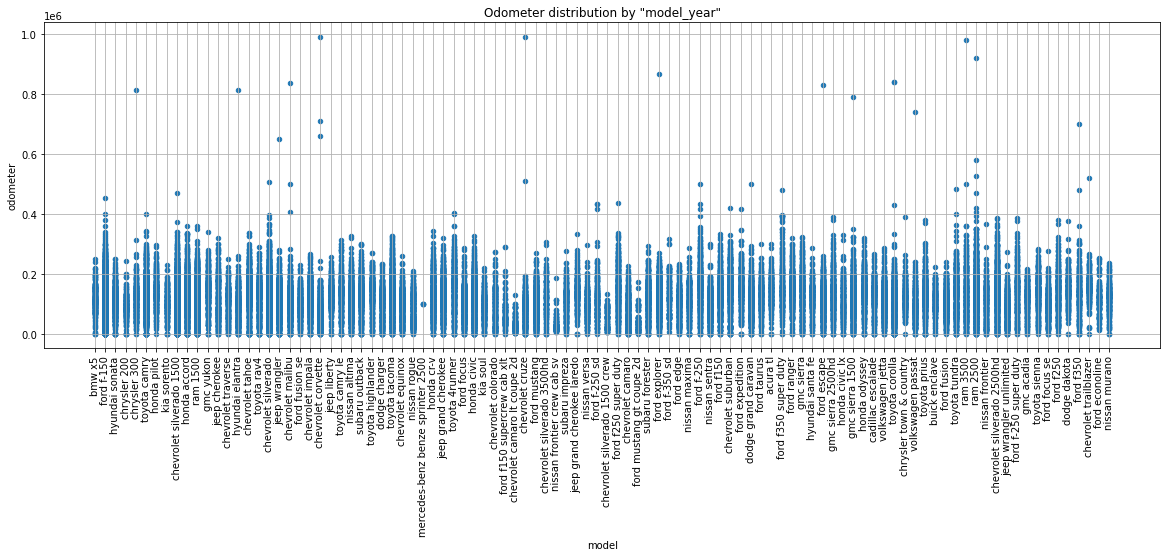

In [73]:
# Determina los límites para valores atípicos en "odometer" por modelo
df.plot(x='model',y='odometer',kind='scatter',grid=True,figsize=(20,6),title='Odometer distribution by "model_year"',rot=90)

Para el caso de odometer, podemos ver que el rango de millas recorridas registradas va desde `0` a `300000` millas recorridas aproximadamente, los modelos que se encuentran por encima son la minoría, sin embargo también se tiene un problema similar que con `price` y es que hay muchos registros de automoviles con millas de 0 lo cuál nos da a pensar que aun son nuevos. Comprobaremos esta teoría. 

condition
good         72
excellent    55
fair          6
like new      4
salvage       2
Name: price, dtype: int64


<AxesSubplot:xlabel='condition'>

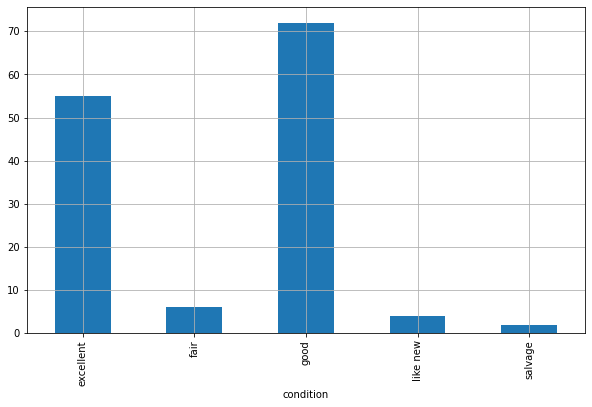

In [74]:
# Buscando registros con "odometer" en cero de acuerdo a "condition"
print(df[df['odometer'] == 0].groupby('condition')['price'].count().sort_values(ascending=False))
df[df['odometer'] == 0].groupby('condition')['price'].count().plot(kind='bar',figsize=(10,6),grid=True)

Podemos observar que nuestra teoría no coincide con los datos pues dentro de las categorias de la columna `condition` tenemos registros con `odometer` igual a 0. A excepción de las categorías `excellent` y `new`, el resto de categorías podriamos considerarlas con este resultado se consideraría atípico meramente por la descripción de `condition`.

Aun debemos definir el rango inferior permisible para esta columna.

<AxesSubplot:title={'center':'Odometer distribution by "model_year"'}, xlabel='model', ylabel='odometer'>

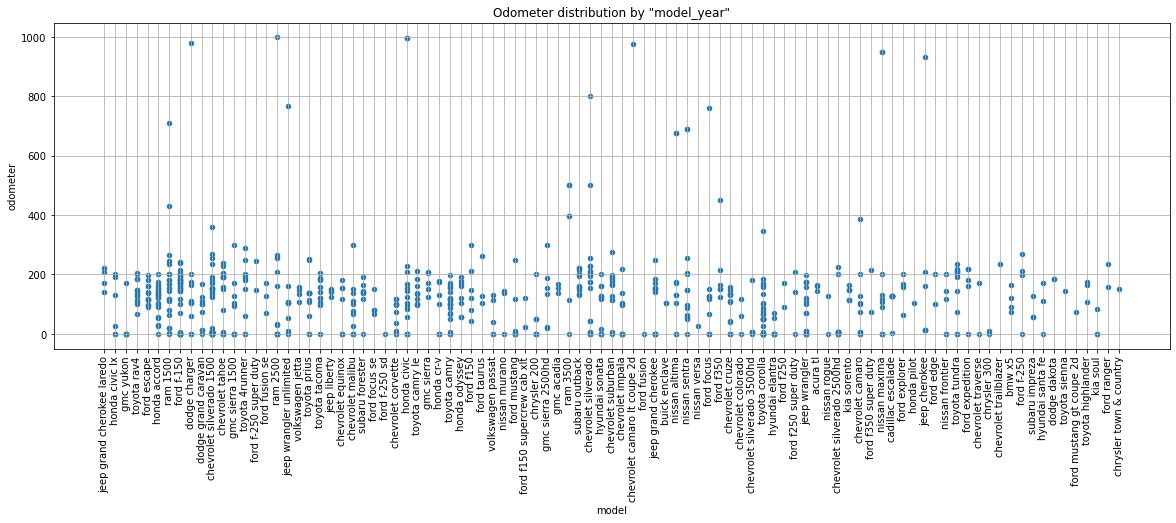

In [75]:
# Obteniendo rango inferior de "odometer"
df[df['odometer'] < 1000].plot(x='model',y='odometer',kind='scatter',grid=True,figsize=(20,6),title='Odometer distribution by "model_year"',rot=90)

Como podemos observar, hay una concentración más densa en el rango de `0` a `200` millas, de ahí en adelante la distribución es más dispersa, podemos echar un vistazo al comportamiento para valores por encima de `1000` millas.

<AxesSubplot:title={'center':'Odometer distribution by "model_year"'}, xlabel='model', ylabel='odometer'>

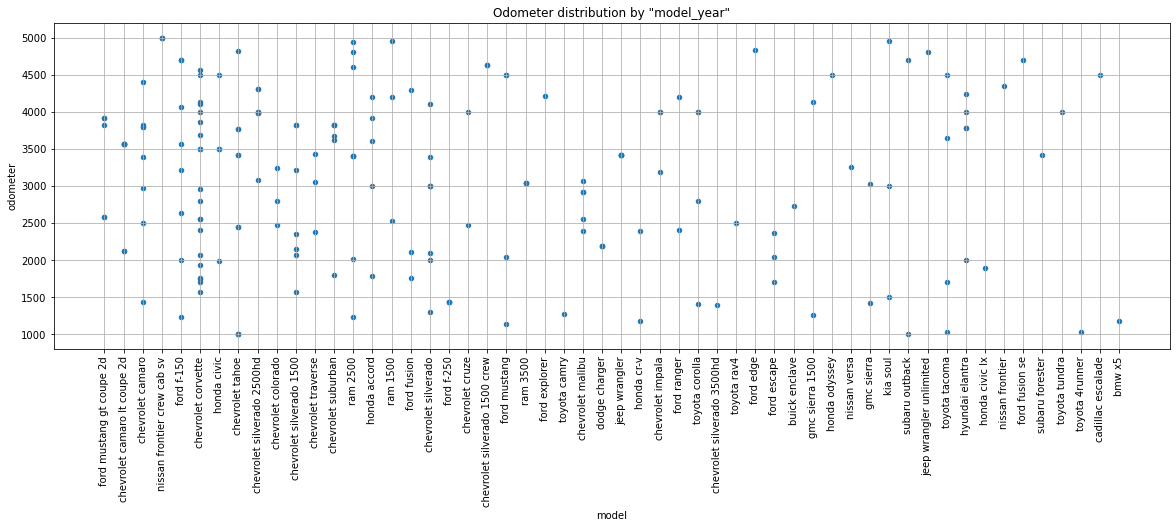

In [76]:
# Obteniendo gráfica de disperición para valores por encima de 1000 y menores a 50000 "odometer"
df[(df['odometer'] > 1000) & (df['odometer'] < 5000)].plot(x='model',y='odometer',kind='scatter',grid=True,figsize=(20,6),title='Odometer distribution by "model_year"',rot=90)

Nuestra observación fue correcta, las millas por encima de `1000` tienen una dispeerción con mayor coherencia que las menores a `200` por tal razón, todos los registros que se encuentren por debado de las `200` millas serán considerados valores atípicos.

In [77]:
# Almacena los datos sin valores atípicos en un DataFrame separado
clean_df = df[(df['odometer'] > 200) & (df['odometer'] <= 350000) & (df['price'] > 1000) & (df['price'] <= 100000)]
clean_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,cat_condition,date_posted_weekday,date_posted_month,date_posted_year,car_years,mean_odometer_per_year
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,white,True,2018-06-23,19,2.0,Saturday,June,2018,7.0,20714.285714
1,25500,2014.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2.0,Friday,October,2018,4.0,22176.250000
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,4.0,Thursday,February,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8,gas,161397.0,automatic,pickup,white,False,2019-03-22,9,1.0,Friday,March,2019,16.0,10087.312500
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,3.0,Tuesday,April,2019,2.0,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44091,9249,2013.0,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,4.0,Wednesday,October,2018,5.0,17627.200000
44092,2700,2002.0,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,0.0,Wednesday,November,2018,16.0,11343.750000
44093,3950,2009.0,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,3.0,Thursday,November,2018,9.0,14222.222222
44094,7455,2013.0,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2.0,Monday,July,2018,5.0,27914.600000


## Estudiar parámetros principales sin valores atípicos

Una vez tenemos un `df` filtrado, sin valores atípicos, podemos empezar a estudiar los parámetros con los que se relaciona y comenzar a detectar patrones sin preocupaciones por sesgos.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

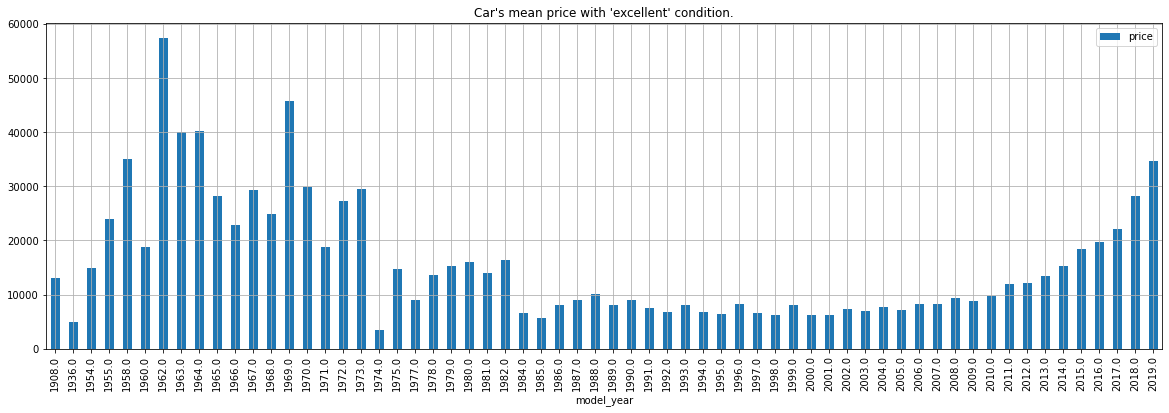

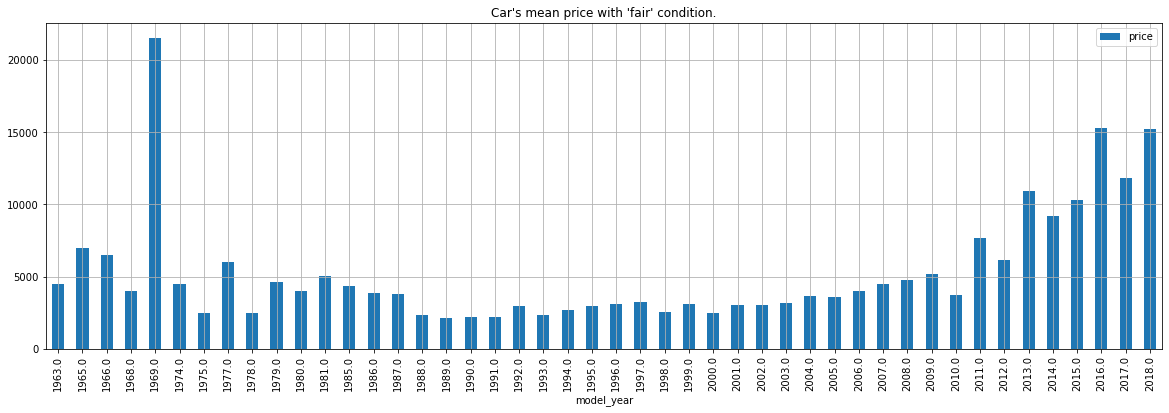

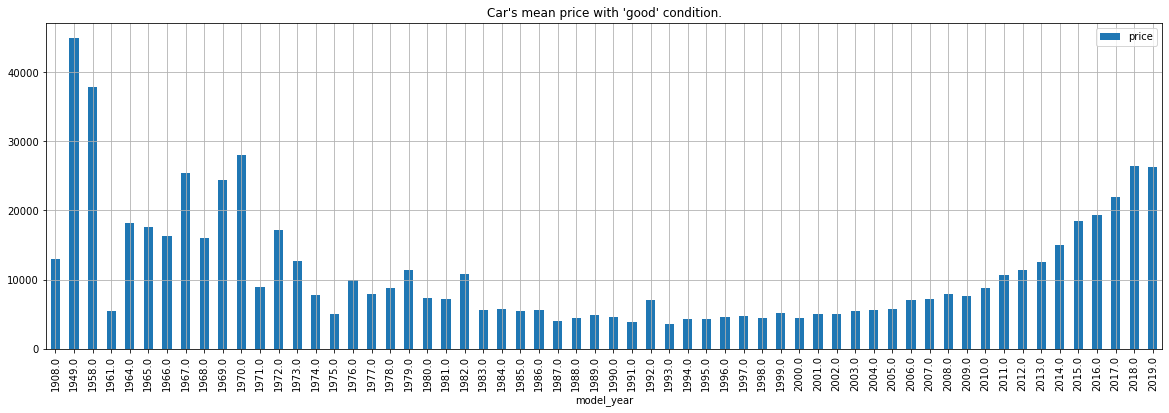

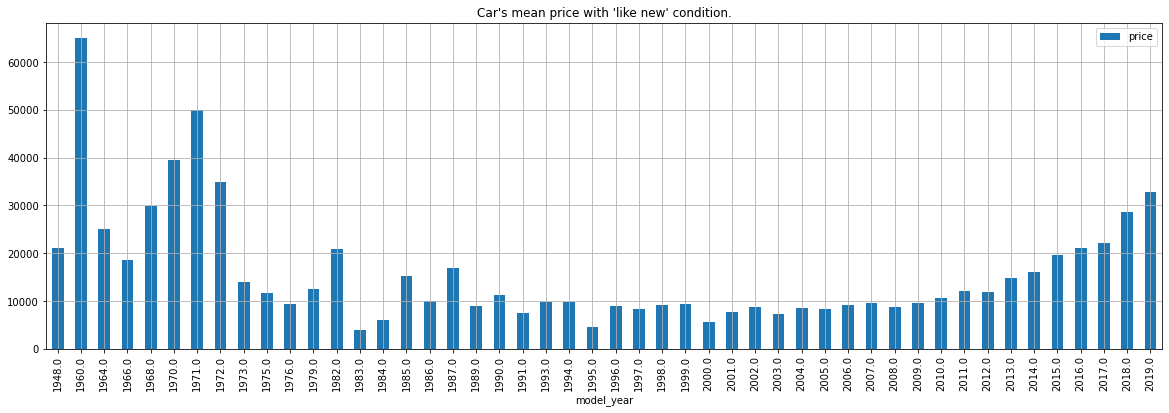

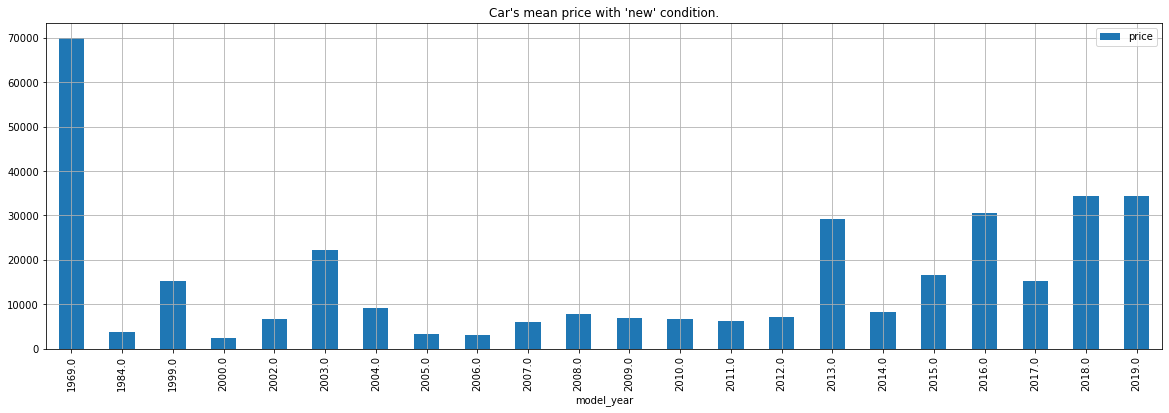

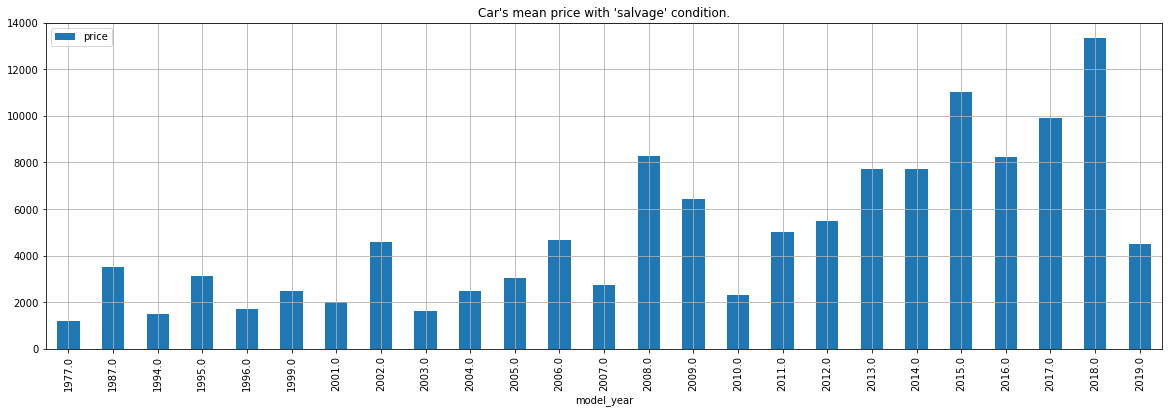

In [78]:
# Analizando los precios medios año dependiendo de la condición del automovil
for condition, table in clean_df.groupby('condition'):
    table = table.pivot_table(index='model_year',values='price',aggfunc='mean')
    table.plot(kind='bar',figsize=(20,6),grid=True,title=f"Car's mean price with '{condition}' condition.")

Las gráficas nos indican que aun omitiendo los valores atípicos y categorizando por condición, hay modelos entre `1908` y `1988` que pueden tener precios demasiado elevados en promedio o demasiado bajos en promedio.

Para autos en condición `excellent`:

- `1949`, `1962`, `1964` y `1969` que son modelos que en promedio tiene precios muy elevados.
- `1936`, `1961` y `1974` que a pesar de estar situados entre modelos que tienen precios elevados, en estos años se presentan los precios más bajos en promedio.

También podemos observar que posteriores a `1988` y hasta `2010` el rango de precios de los automóviles se encuentra entre `1000` y `10,000`, entre `2011` y `2016` el rango va desde `10,000` hasta `20,000` y por último de `2017` en adelante va de los `20,000` y hasta `35,000` aproximadamente.

Para autos en condición `fair`:

Se tiene una mejor distribución entre los autos más antigüos a excepción de los modelos de `1969` en la que se dispara el precio promedio cerca de los `25,000` mientras que la mayoría se mantiene en un rango de entre `1,000` y `5,000` y teniendo como segundo grupo más representativo aquellos precios que van de `5,000` a `10,000`.

Para autos en condición `good` y `like new`:

Se tiene una distribución muy similar a los autos en condición `excellent` variando un poco los años pero en general es la misma descripción.

Para autos en condición `new`:

Este es un caso interesante pues aunque las condiciones registradas para estos automóviles es "nuevo" los precios en general esta por debajo de los `10,000` y el resto se extiende de `10,000` hasta `35,000` sin embargo y en específico para el año `1969` se tiene un promedio de precio de `70,000` lo cual apunta muy probablemente a un solo caso con esta condición.


Para autos en condición `salvage`:

La gráfica tiene una distribución de casi una curva suave ascendente donde los modelos más viejos tienden a tener menor costo que los nuevos.



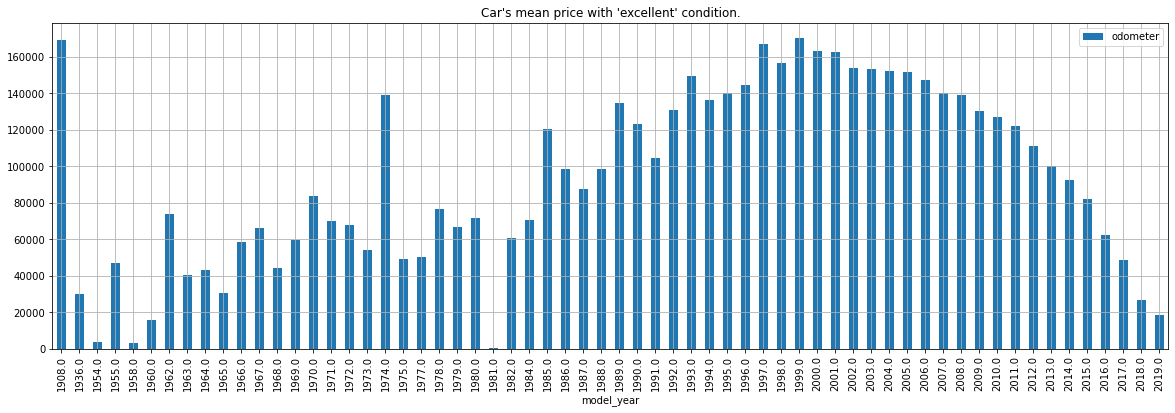

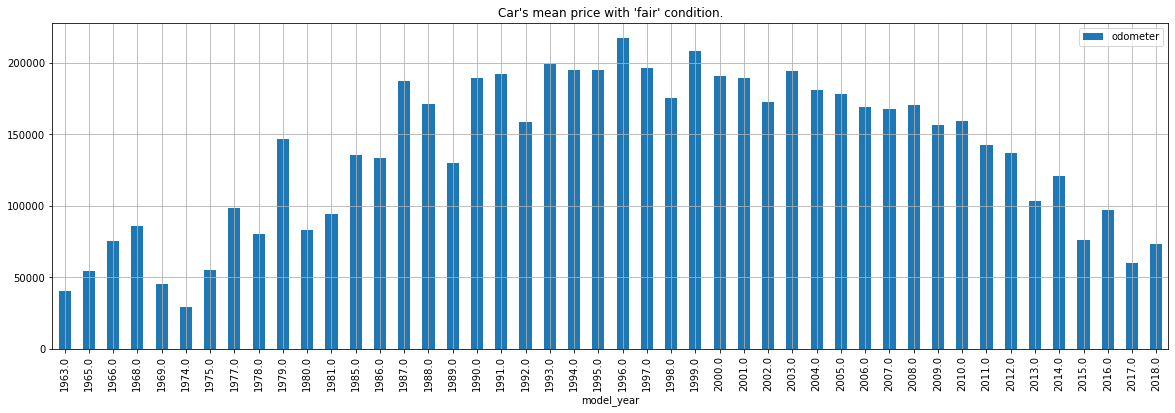

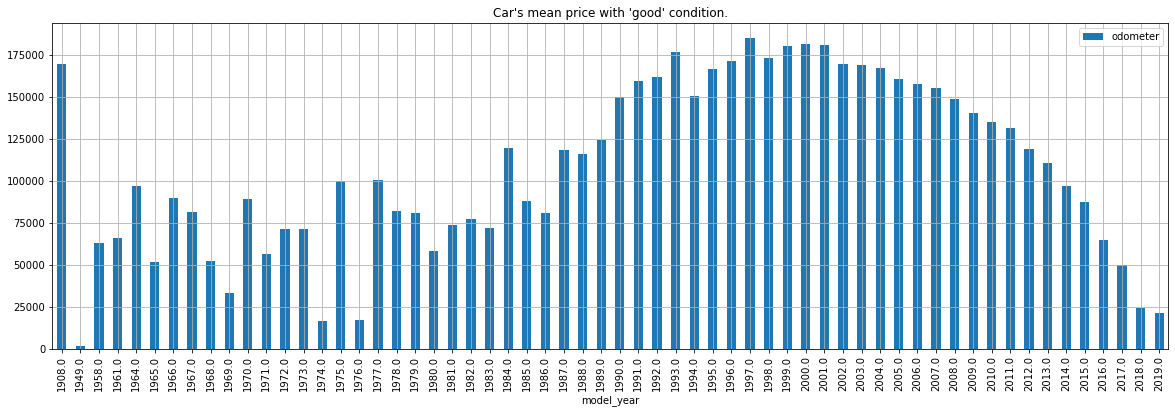

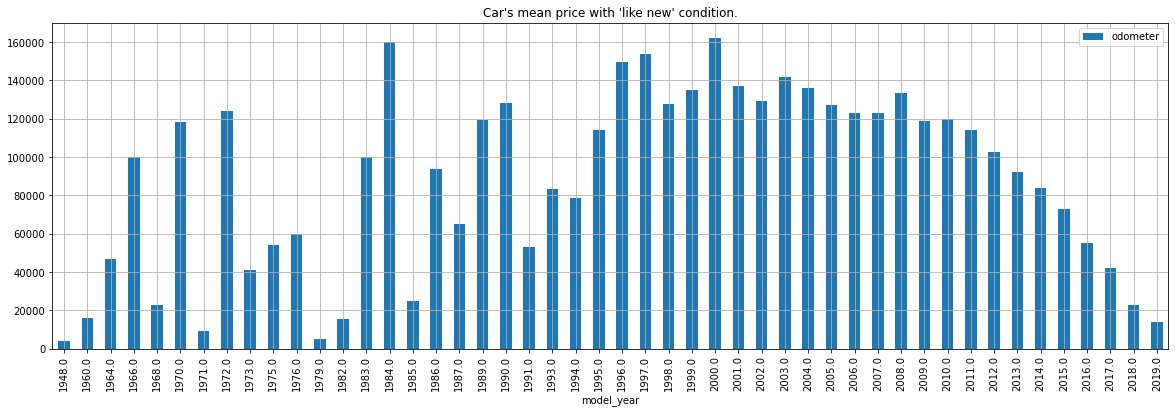

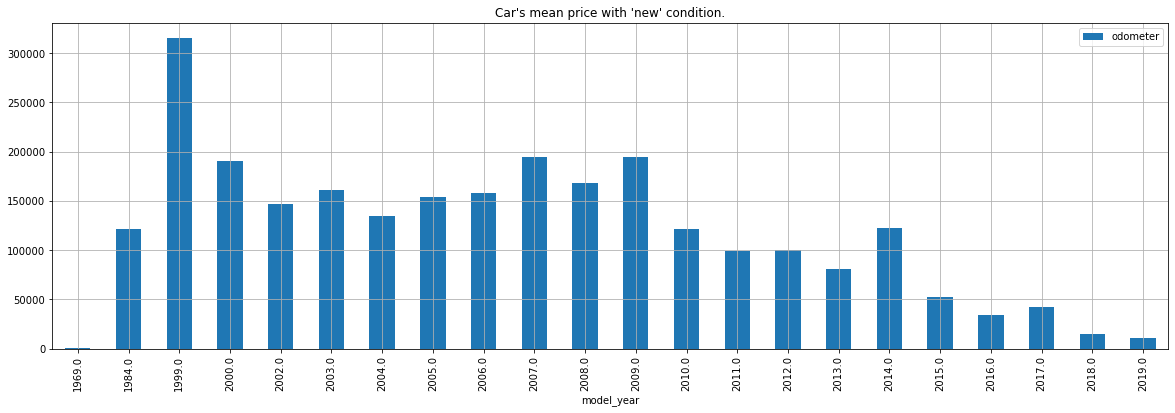

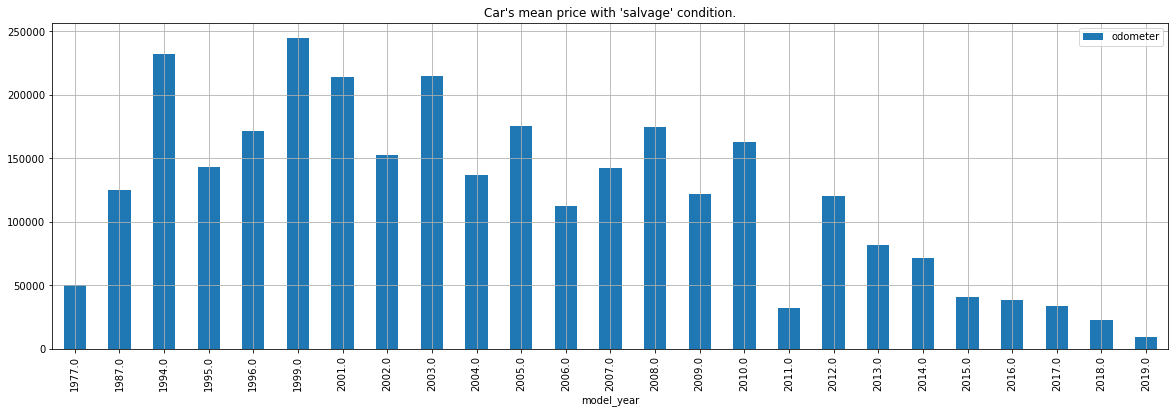

In [79]:
# Analizando los millaje medio por año dependiendo de la condición del automovil
for condition, table in clean_df.groupby('condition'):
    table = table.pivot_table(index='model_year',values='odometer',aggfunc='mean')
    table.plot(kind='bar',figsize=(20,6),grid=True,title=f"Car's mean price with '{condition}' condition.")

Con respecto a las graficas de millas promedio por año, podemos observar el caso de `1969` en conditiones `new` tiene un millaje practicamente de `0` lo cuál nos podría esta hablando de un auto clasico y eso podría justificar por completo el precio anteriormente mencionado.

## Periodo de colocación de los anuncios

Ahora estudiaremos lo que nos pueda proporcionar la columna `days_listed` con la intención de encontrar la periodicidad de los anuncios posteados y hay alguna anomalía en los datos.

/var/folders/g2/6f4slx3d02g5s4th9bbb102m0000gn/T/ipykernel_5788/3301630828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['days_listed_group'] = (clean_df['days_listed']/15).astype('int64')


<AxesSubplot:xlabel='Intervalos de 15 días cada uno.'>

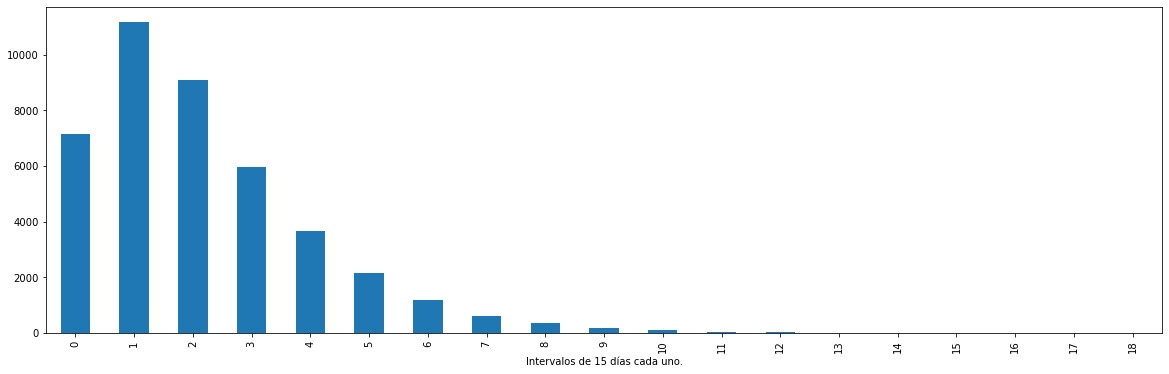

In [80]:
# Graficando la cantidad de días que duro un anuncio
clean_df['days_listed_group'] = (clean_df['days_listed']/15).astype('int64')
clean_df.groupby('days_listed_group')['price'].count().plot(kind='bar',figsize=(20,6),xlabel='Intervalos de 15 días cada uno.')

De manera general, podemos observar que los días que llevan los anuncios posteados estan entre `0` y `100` aproximadamente, sin embargo también podemos observar que hay anuncios que llevan poco más de medio año listados, por tal razón es importante indagar más a fondo en estos casos.

Comenzaremos analizando los anuncios que tuvierón una duración corta.

In [81]:
# Anuncios con "days_listed" relativamente corta
print(max(clean_df['date_posted']))
print(min(clean_df['date_posted']))

clean_df['days_listed'].value_counts()

2019-04-19 00:00:00
2018-05-01 00:00:00


18     783
19     769
24     764
25     763
16     763
      ... 
209      1
201      1
169      1
188      1
221      1
Name: days_listed, Length: 220, dtype: int64

Primero, es importante definir el rango de fechas que va desde `2018-05-01` hasta `2019-04-19`, sobre este perdiodo analizaremos lo que esta sucediendo con aquellos registros que tienen `days_listed` igual a `0`.

Cantidad de autos para el rango de 0 a 50: 100 29661
Cantidad de autos para el rango de 50 a 100: 99 10391
Cantidad de autos para el rango de 100 a 150: 99 1483
Cantidad de autos para el rango de 150 a 200: 69 172
Cantidad de autos para el rango de 200 a 250: 16 20
Cantidad de autos para el rango de 250 a 300: 5 5
Cantidad de autos para el rango de 300 a 350: 0 0
Cantidad de autos para el rango de 300 a 400: 0 0
Cantidad de autos para el rango de 300 a 450: 0 0
Cantidad de autos para el rango de 300 a 500: 0 0
Cantidad de autos para el rango de 300 a 550: 0 0
Cantidad de autos para el rango de 300 a 600: 0 0
Cantidad de autos para el rango de 300 a 650: 0 0
Cantidad de autos para el rango de 300 a 700: 0 0
Cantidad de autos para el rango de 300 a 750: 0 0


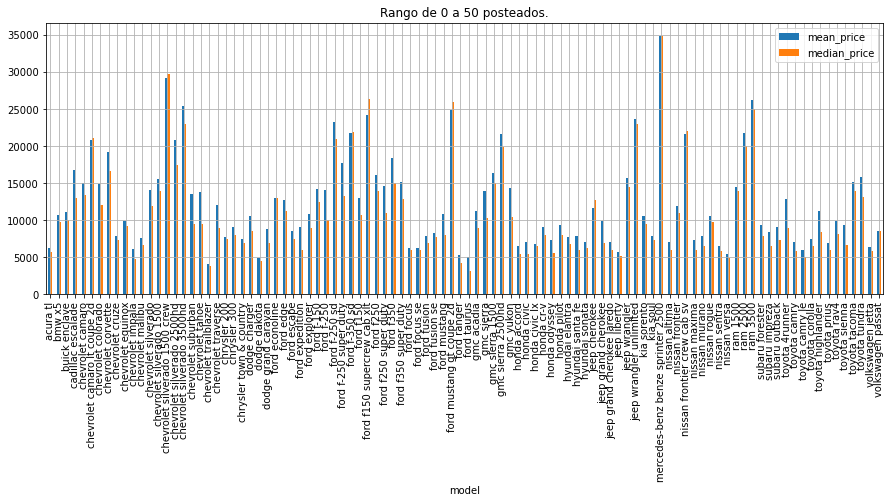

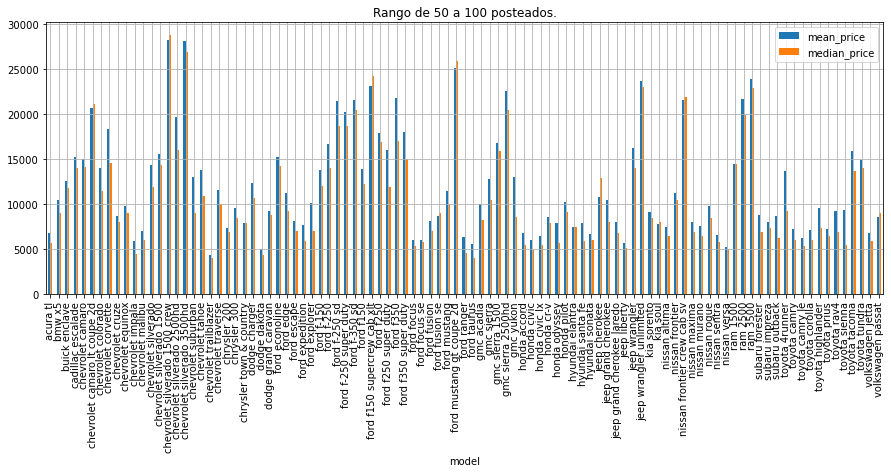

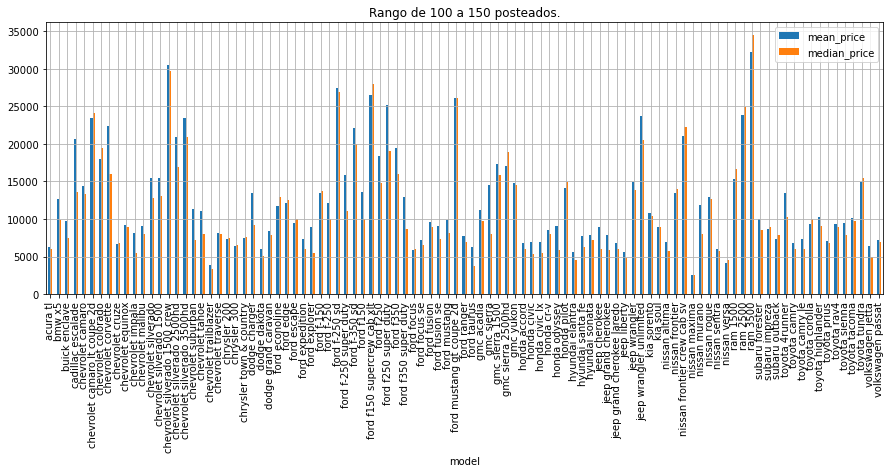

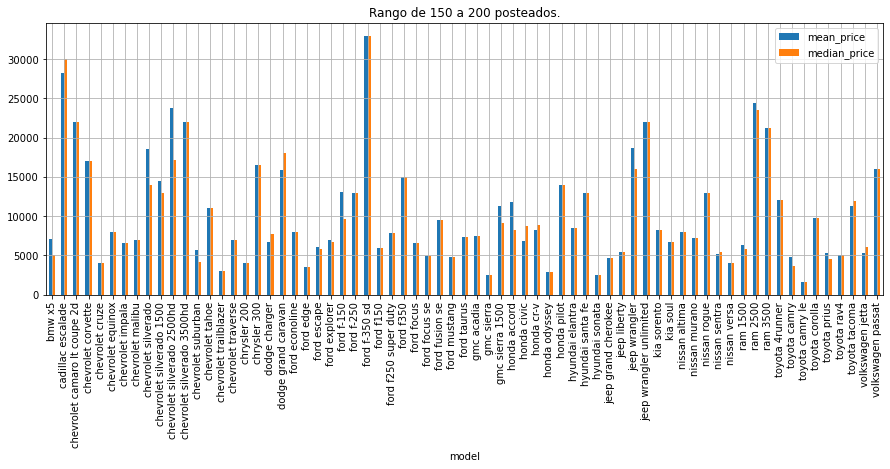

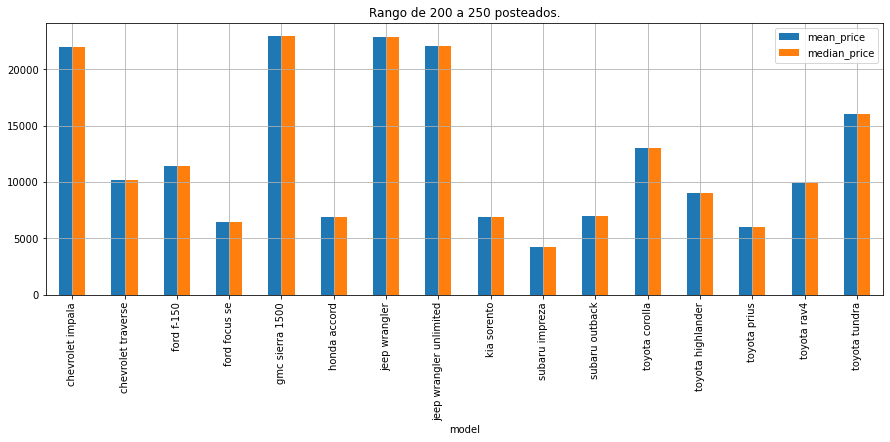

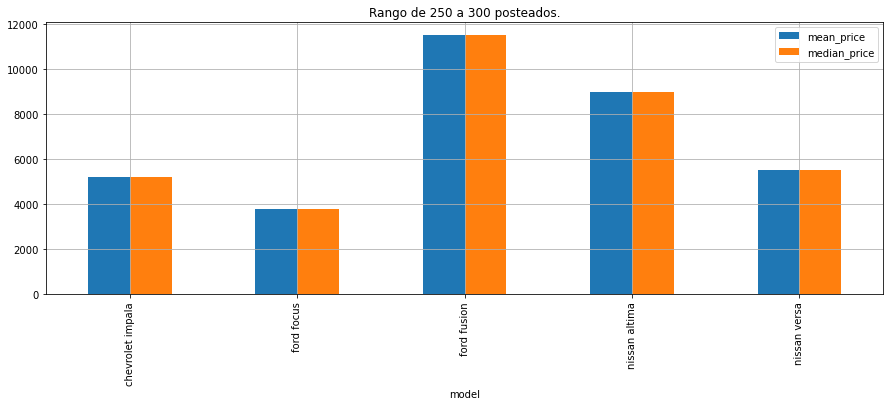

In [82]:
# Analizando precios medios y medianos de aquellos automoviles que tuvieron 0 días listados
days = range(50,800,50)
counter = 0
for day in days:
    try:
        result= clean_df[(clean_df['days_listed'] >= counter) & (clean_df['days_listed'] < day)]
        print(f'Cantidad de autos para el rango de {counter} a {day}:',len(result['model'].unique()),len(result['model']))
        result = result.pivot_table(index='model',values='price',aggfunc=['mean','median'])
        result.columns = ['mean_price','median_price']
        result.plot(kind='bar',figsize=(15,5),grid=True,title=f"Rango de {counter} a {day} posteados.")
        counter += 50
    except:
        pass



De acuerdo con lo anteriormente desglozado, podemos determinar dos cosas, la primera es que para la cantidad de días anormalmente bajos tenemos que limitar la investigación en quellos con una duración de `0`, por otro lado podemos detectar la cantidad de registros que tienen una cantidad de días anormalmente largo y es para el caso de los rangos de `150` a `300` días.

In [83]:
# Analizando "days_listed" con valor de 0
result = clean_df[clean_df['days_listed'] == 0].pivot_table(index='model',values=['price','odometer'],aggfunc='mean')

result['compare_price'] = pd.Series(len(result))
result['compare_odometer'] = pd.Series(len(result))
for model in result.index:
    result['compare_price'][model] = clean_df[clean_df['model'] == model]['price'].mean()
    result['compare_odometer'][model] = clean_df[clean_df['model'] == model]['odometer'].mean()
    
result.sort_values(by=['price','odometer'],ascending=False)

,odometer,price,compare_price,compare_odometer
model,,,,
chevrolet silverado 2500hd,14151.500000,59589.000000,20576.660485,136782.927247
toyota highlander,7985.000000,39900.000000,10838.101399,139639.543706
ford econoline,117000.000000,29999.000000,13393.864286,115407.335714
honda pilot,37093.000000,21997.000000,9677.181818,139957.316364
dodge grand caravan,45677.000000,16995.000000,8956.887574,109222.027613
chevrolet corvette,24540.000000,16750.000000,19116.029083,73764.344519
ford f-150,90048.000000,15000.000000,14125.142918,124805.661104
ford f350 super duty,126650.000000,14995.000000,15688.613208,153795.735849
ford f250,137500.000000,14000.000000,16605.570946,137853.692568


In [84]:
# Verificando la cantidad de modelos que estan contenidos este dataframe filtrado
result.groupby('model')['price'].count()

model
chevrolet camaro              1
chevrolet corvette            1
chevrolet malibu              1
chevrolet silverado           1
chevrolet silverado 1500      1
chevrolet silverado 2500hd    1
chrysler town & country       1
dodge grand caravan           1
ford econoline                1
ford f-150                    1
ford f250                     1
ford f250 super duty          1
ford f350 super duty          1
ford mustang                  1
ford taurus                   1
gmc sierra                    1
gmc sierra 1500               1
honda accord                  1
honda civic                   1
honda odyssey                 1
honda pilot                   1
hyundai elantra               1
jeep grand cherokee laredo    1
kia sorento                   1
kia soul                      1
nissan sentra                 1
ram 1500                      1
toyota 4runner                1
toyota corolla                1
toyota highlander             1
toyota prius                  1
to

Con lo anteriormente expuesto, podemos concluir dos posibilidades de la cantidad de días listados anormalemente bajos (0 días). De acuendo con la contabilización de modelos que se tienen en este nuevo dataframe filtrado es que su comparación es de uno a uno, por ende, se concluye lo siguiente:
- Los automoviles pudierón venderse muy rápido debido al precio que se encontraba considerablemente por debajo del promedio del resto o porque el millaje registrado también fue considerablemente menor al del resto.
- Los precios al momento de ser registrados fuerón exageradamente elevados lo cual provoco que el mismo sistema diera de baja la publicación por posible inflación de precio.

Ahora comenzaremos a analizar lo que sucede con los días listados excesivamente largos.

In [85]:
# Generando nuevo df con "days_listed" en un rango de 150 a 300
result = clean_df[clean_df['days_listed'] >= 150].pivot_table(index='model',values=['price','odometer'],aggfunc='mean')

result['compare_price'] = pd.Series(len(result))
result['compare_odometer'] = pd.Series(len(result))
for model in result.index:
    result['compare_price'][model] = clean_df[clean_df['model'] == model]['price'].mean()
    result['compare_odometer'][model] = clean_df[clean_df['model'] == model]['odometer'].mean()
    
result.sort_values(by=['price','odometer'],ascending=False)

,odometer,price,compare_price,compare_odometer
model,,,,
ford f-350 sd,135987.000000,32988.00,21803.985294,130140.841912
cadillac escalade,126315.666667,28265.00,16700.456835,130353.048561
ram 2500,97631.750000,24472.50,21842.023041,136802.493088
chevrolet silverado 2500hd,142398.375000,23805.25,20576.660485,136782.927247
jeep wrangler unlimited,92459.166667,22065.00,23613.214092,83823.773713
...,...,...,...,...
chevrolet trailblazer,174000.000000,2999.00,4142.698198,155507.479730
honda odyssey,183198.500000,2900.00,7502.563452,144677.719543
hyundai sonata,200000.000000,2500.00,6987.251834,109660.772616


Respecto a los registros excesivamente largos podemos concluir que esto es debido a que si bien el automóvil esta a un precio razonable o relativamente por debajo del promedio del resto, el millaje recorrido con el es excesivamente alto por lo que puede generar desconfianza por parte del posible comprador y pasar de largo.

## Precio promedio por cada tipo de vehículo


Procederemos a analizar la cantidad de anuncios y el precio promedio que tiene cada tipo de vehículo con la intención de encontrar aquellos tipos que son más representativos en nuestra muestra.

<AxesSubplot:title={'center':'Cantidad de anuncios por tipo de vehículo.'}, xlabel='type'>

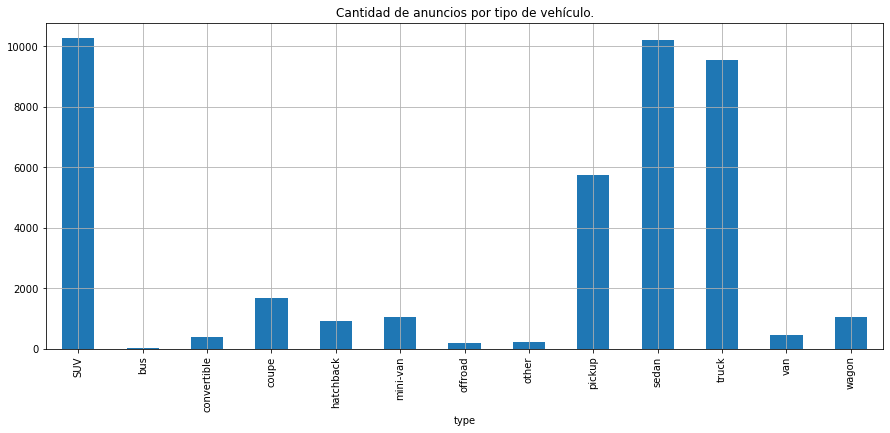

In [86]:
# Analizando cantidad de anuncios por modelo
clean_df.groupby('type')['price'].count().plot(kind='bar',grid=True,figsize=(15,6),title="Cantidad de anuncios por tipo de vehículo.")

De acuerdo con la gráfica, tenemos 4 grandes grupos de la columna `type` que explica de que tipo de vehículo se trata y son:
- `SUV`
- `sedan`
- `truck`
- `pickup`

Por lo tanto esto nos indica que la cantidad de anuncios esta estrechamente relacionado con el tipo de vehículo que se esta registrando y si bien uno ve las estadísticas de los últimos años, al menos un hecho confirmable es que la mayoría de las personas que adquieren un automóvil por practicidad se inclinan por `SUV's` y `sedanes` para propósitos principalmente familiares.

## Factores de precio


Por último iniciaremos con genera una matriz de correlación buscando aquellas que esten realcionadas con el precio establecido a cada registro, esto nos permitirá encontrar las características en las que debemos poner mayor atención que pueden ser influyentes para determinar el precio de cada vehículo.

In [87]:
df_result = clean_df[(clean_df['type'] == 'SUV') | (clean_df['type'] == 'sedan')]
df_result.corr()

,price,model_year,cylinders,odometer,days_listed,cat_condition,date_posted_year,car_years,mean_odometer_per_year,days_listed_group
price,1.000000,0.545125,0.160392,-0.565610,-0.008029,0.273099,0.012313,-0.542826,0.255279,-0.008603
model_year,0.545125,1.000000,-0.231484,-0.641383,-0.004965,0.297561,0.018199,-0.996231,0.521378,-0.004756
cylinders,0.160392,-0.231484,1.000000,0.196906,0.007448,-0.066338,0.000482,0.230888,-0.111476,0.006035
odometer,-0.565610,-0.641383,0.196906,1.000000,0.007995,-0.327987,-0.017614,0.638294,-0.072596,0.007565
days_listed,-0.008029,-0.004965,0.007448,0.007995,1.000000,-0.018394,0.006083,0.005426,-0.009780,0.988775
cat_condition,0.273099,0.297561,-0.066338,-0.327987,-0.018394,1.000000,0.009144,-0.296058,0.096381,-0.018535
date_posted_year,0.012313,0.018199,0.000482,-0.017614,0.006083,0.009144,1.000000,0.068594,-0.144887,0.006746
car_years,-0.542826,-0.996231,0.230888,0.638294,0.005426,-0.296058,0.068594,1.000000,-0.532806,0.005286
mean_odometer_per_year,0.255279,0.521378,-0.111476,-0.072596,-0.009780,0.096381,-0.144887,-0.532806,1.000000,-0.008591
days_listed_group,-0.008603,-0.004756,0.006035,0.007565,0.988775,-0.018535,0.006746,0.005286,-0.008591,1.000000


Nuestra variable de interes es `price` y como podemos apreciar en la matriz de correlación algunas de las columnas tienen una correlación considerable que debemos analizar con el fin de poder determinar que factores son los más influyentes para determinar el precio de un automóvil.

Dentro de las columnas tenemos a:
- `model_year` con una correlación positiva de 0.52
- `odometer` con una correlación negativa de -0.56
- `car_years` con una correlación negativa de -0.52
- `condition` con una correlación positiva de 0.27
- `mean_odometer_per_year` con una correlación negativa de -0.61

Ademas también cabe resaltar que `transmission` y `paint_color` también deben ser analizadas por el hecho de que pudierán ser factores influeyentes que no se ven en la matriz de correlación debido a que esta trabaja unicamente con tipos de datos numéricos o bool.

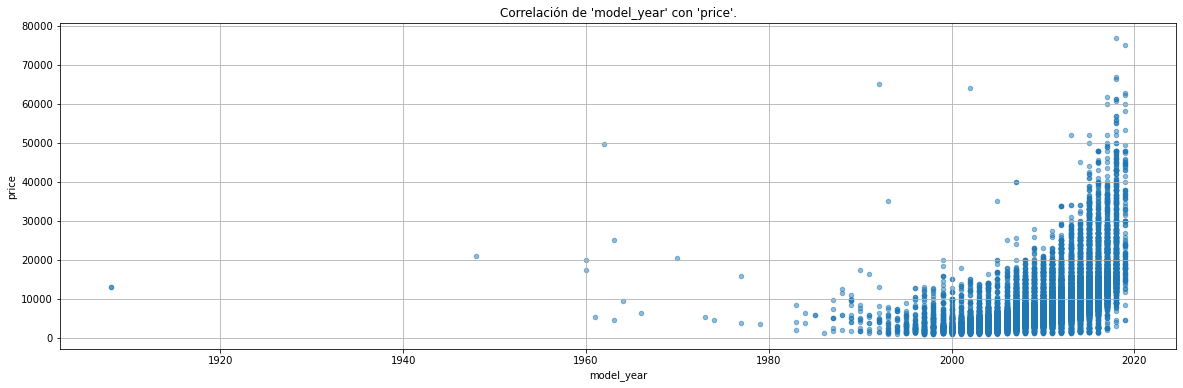

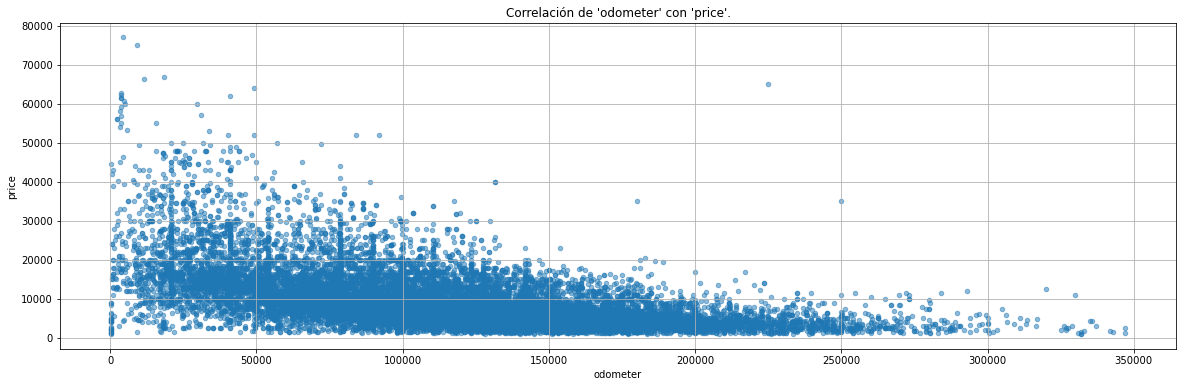

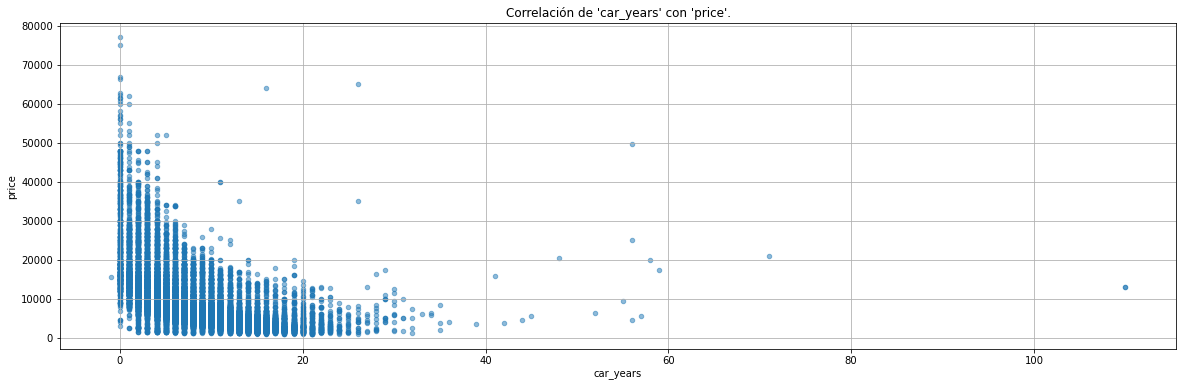

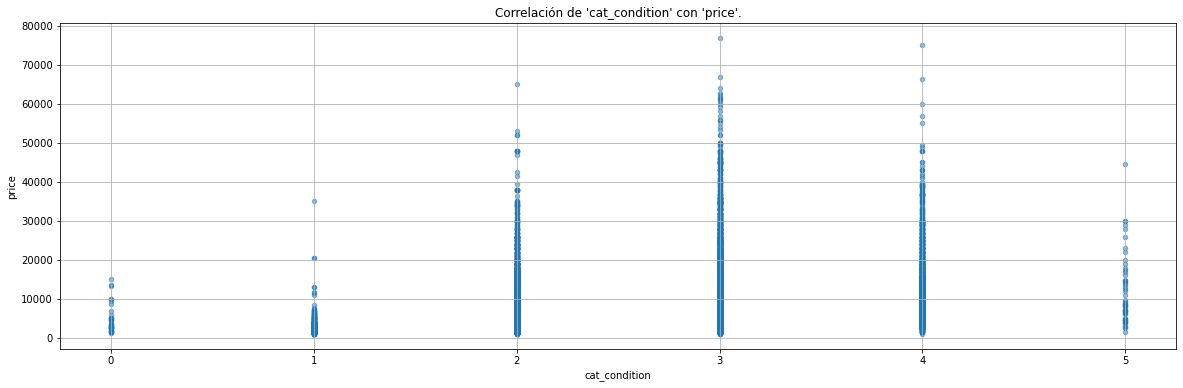

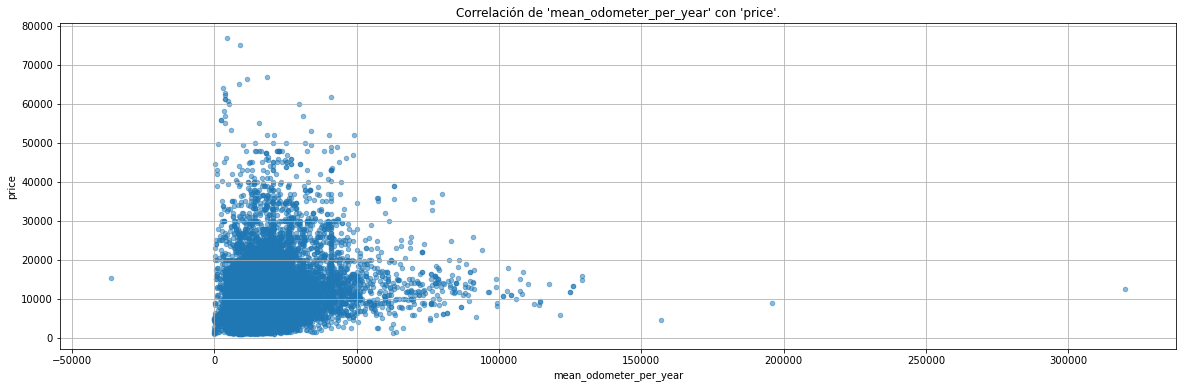

In [88]:
# Generando gráficos de disperción para "model_year"
l = ['model_year','odometer','car_years','cat_condition','mean_odometer_per_year']
for i in l:
    df_result.plot(x=i,y='price',kind='scatter',grid=True,figsize=(20,6),title=f"Correlación de '{i}' con 'price'.",alpha=0.5)

Podemos ver que aquellas columnas que tienen una correlación con la columna `price` son determinantes de la misma concluyendo lo siguiente:
- Los modelos más recientes, tienden a impactar más en el precio provocando que este se eleve
- Los automóviles con millajes recorridos registrados menores, tienden a generar mayor confianza debido al poco uso por ende, aquellos que tienen pocos años en el mercado tienen el mismo resultado pues se trata de la misma medida.
- Si bien no es del todo clara lo que engloban las condiciones de los autos esta es relevante pues aquellos autos en condiciones aceptables o incluso mejores, tienden a tener precios más elevados que aquellos que estan el calidad de reparables o inservibles.

Ademas también es importante resaltar el interes en general de los compradores por tipos de autos ya sean `SUV` o `sedan` que tienen como principal propósito ser familiares.

**Nota**: No es posible generar gráficos de caja y bigote para variables categóricas, esto es debido a que de lo que se encarga este tipo de gráfica es de determinar cuartiles y promedio de valores numéricos, no contabilizar, sin embargo, se agregan dos gráficos que muestran la distribución del color más representativo y la transmisión más representativos de la muestra.

<AxesSubplot:title={'center':"Categoría representativa de 'paint_color'."}, xlabel='paint_color'>

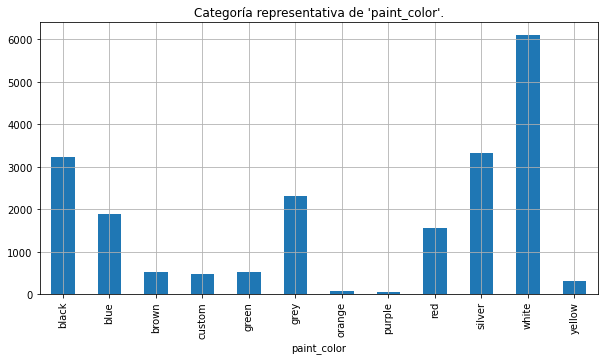

In [89]:
# Generando gráficos barras para "paint_color"
df_result.groupby('paint_color')['price'].count().plot(kind='bar',figsize=(10,5),grid=True,title=f"Categoría representativa de 'paint_color'.")

<AxesSubplot:title={'center':"Categoría representativa de 'transmission'."}, xlabel='transmission'>

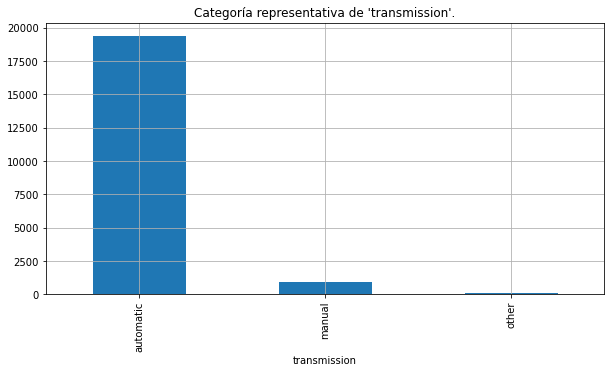

In [90]:
# Generando gráficos barras para "transmission"
df_result.groupby('transmission')['price'].count().plot(kind='bar',figsize=(10,5),grid=True,title=f"Categoría representativa de 'transmission'.")

Con respecto a estas últimas dos columnas analizadas, podemos observar que los clientes se inclinan por hacer compras de automóviles de color `blanco` y que tengan transmisión `automatica` por encima del resto.

## Conclusión general

Partiendo del hecho de que tuvimos un dataset que tenía problemas con algunos registros así también con el tipo de dato y sobre todo con valores ausentes, es importante comenzar el preprocesamiento de una manera que prevenga complicaciones futuras.

Para este proyecto se realiza lo siguiente:
- Es importante una descripción rápida de las características de los datos para saber de entrada de que se trata y con que nos vamos a ir enfrentando en cuanto a valores ausentes, tipos de datos, nombres de columnas descriptivos, etc.
- Se observo a detalle cada una de las columnas pues a pesar de que nos proveyeron con la descripción de las mismas, ademas de que, el nombre de la columna fue claro en todo momento es bueno echar un vistazo a los datos que contiene con la intención de comenzar el preprocesamiento con aquellas columnas que son sencillas de trabajar.
- El análisis debe ser detallado a niveles profundos (si este lo permite) con la intención de evitar trabajo extra tanto humano como de procesamiento, en este caso en particular, nos encontramos con que había registros dobles en nuestros datos con fechas distintas, los cuales podían provocar algun tipo de sesgo en algunos de nuestros datos y principalmente al cálculo de `mean` y `median`.
- Aveces nos encontraremos con información que debemos completar con medio externos, ya sea investigando, preguntando, leyendo algún artículo, etc. Esto nos permitirá trabajar con más confianza con los datos si estos no nos ofrecen información del todo clara.

Ya hablando en específico con lo que hicimos durante la realización de este proyecto, fue necesario completar algunas columnas con valores ausentes, sin embargo nos encontramos con dos columnas en específico difícil de trabajar y fuerón:
- `odometer`: Que para poder completar la mayoría de los valores usentes que tenía, tuvimos que hacer una tabla filtrada en la que se omitieran los registros `null` tanto en `odometer` como en `model_year` y validar extraer los promedios de millajes registrado por años.
- `model_year`: Para esta colúmna fue importante conjuntar varías características pues para este punto, la condición en la que se encuentra el automóvil, el modelo que es, y extrayendo un rango posible en el que se pudiera encontrar el millaje recorrido (una variación de mas menos 5%), se pudo calcular aproximadamente que año le correspondía al modelo.

Aun haciendo esto, no fue posible trabajar con el 100% de los valores ausentes.

Posteriormente se observo que había valores atípicos respecto a `price` y `odometer`, en un principio, se analizo que probablemente esto se debía a que autos en condiciones de `new` tenían presencia ante esta situación sin embargo no fue de esa forma. Nos encontramos con muchos registros con precios por debajo de `1000` e incluso muchos otros de `1` lo que nos llevo a pensar que posiblemente se trataba de personas que solicitaban una oferta, sin embargo estos valores tuvierón que se excluidos del análisis final puesto que provocaban sesgos en el calculo promedio de precios de los vehículos, siendo la misma situación para `odometer` donde nos encontramos con autos que superaban con creces las `400,000` mil millas recorridas, si bien esto podía ser posible, se decidio manejar como valores atípicos por afectar de manera significativa los promedios calculados pues la mayor densidad millas se encuentra entre `0` y `350,000` millas recorridas.

Por último, al realizar la matriz de correlación, logramos identificar características que van de la mano para poder determinar el precio de los automóviles y estas son:
- `model_year` 
- `odometer` 
- `car_years` 
- `condition` 
- `mean_odometer_per_year`

Por lo que concluimos que los resultados tienen sentido por lo siguiente:

- Los modelos más recientes, tienden a impactar más en el precio provocando que este se eleve debido a lo reciente que es el automóvil y por ende se asume que tiene menos uso.
- Los automóviles con millajes recorridos registrados menores, tienden a generar mayor confianza debido al poco uso por ende, aquellos que tienen pocos años en el mercado tienen el mismo resultado pues se trata de la misma medida.
- Si bien no es del todo claro lo que engloban las condiciones de los autos esta es relevante pues aquellos autos en condiciones aceptables o incluso mejores, tienden a tener precios más elevados que aquellos que estan en calidad de reparables o inservibles que pueden ser usados solo para extraer sus refacciones.
- De acuerdo con el mercado mundial es congruente que los tipos de autos tienen modas y actualmente las personas buscan autos con propositos familiares en su mayoria, por ende como resultado tenemos que los autos `SUV` y `sedanes` son los más presentes en nuestra muestra.
- De igual forma sucede que en la actualidad las familias buscan la sencilles y el confort por ende buscan autos que tengran tranmisiones automáticas.
